In [1]:
import pandas as pd
import os
import numpy as np
import csv
import tldextract
import matplotlib.pyplot as plt
import seaborn as sns
import re

import email.header
import email.utils
import string
import sys
from dataclasses import dataclass, field
from ietfdata.datatracker import *
from ietfdata.datatracker_ext import *
from ietfdata.mailarchive import *
import ietfdata.mailarchive as ma
import datetime
from datetime import datetime
from datetime import date
import json
import tldextract

# Iterating through mailing lists

In [2]:
archive = ma.MailArchive()

In [3]:
for mailing_list_name in archive.mailing_list_names():
       
    ml = archive.mailing_list(mailing_list_name)

    if ml:
        if ml._num_messages > 0:
            ml_df = ml.messages_dataframe()
            print("\r List- %s , Size- %d " % (mailing_list_name, ml_df.shape[0]), end = '')
            #for index, row in ml_df.iterrows():

 List- zeroconf , Size- 945   337 - 61  130 91 

# Finding unique participant records

In [4]:
ren = r'(?:\.?)([\w\-_+#~!$&\'\.]+(?<!\.)(@|[ ]?\(?[ ]?(at|AT)[ ]?\)?[ ]?)(?<!\.)[\w]+[\w\-\.]*\.[a-zA-Z-]{2,3})(?:[^\w])'
ren2 = r'([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)'

In [5]:
#email_all_set = set()
email_all_dict = dict()
empty_lists = set()
error_maillists = dict()

for mailing_list_name in archive.mailing_list_names():
    
    ml = archive.mailing_list(mailing_list_name)
    if ml:
        
        if ml._num_messages > 0:
            ml_df = ml.messages_dataframe()
            for index, row in ml_df.iterrows():
                try:
                    e = row['From']
                    e = e.replace("'","__apostrophe__")
                    x = re.findall(ren,str(e))
                    
                    if len(x) == 0:
                        x = re.findall(ren2,str(e))
                        if len(x) > 0:
                            email = x[0]
                    else:
                        email = x[0][0]
                    email = email.replace("__apostrophe__","'")#.lower()
                    
                    e = e.replace(email,'')
                    
                    email = email.lower()
                    
                    if '@' not in email:
                        email = email.replace(' at ','@').lower()
                    
                    if email in email_all_dict:
                        email_all_dict[email] = [email_all_dict[email][0],email_all_dict[email][1]+1]
                        continue
                            
                    e = e.strip('>')
                    e = e.strip('<')
                    e = e.strip()
                    e = e.strip('"')
                    e = e.strip()
                    e = e.lower()
                        
                    if email != '':
                        #email_all_set.add(email)
                        email_all_dict[email] = [e,1]
                    
                    if mailing_list_name in error_maillists:
                        error_maillists[mailing_list_name] = [error_maillists[mailing_list_name][0]+1,error_maillists[mailing_list_name][1]]
                    else:
                        error_maillists[mailing_list_name] = [1,0]
                except:
                    if mailing_list_name in error_maillists:
                            error_maillists[mailing_list_name] = [error_maillists[mailing_list_name][0],error_maillists[mailing_list_name][1]+1]
                    else:
                        error_maillists[mailing_list_name] = [0,1]
                    continue
            print(mailing_list_name,str(len(email_all_dict)))
            
        else:
            print(mailing_list_name, "ZERO MESSAGE", len(email_all_dict))
            empty_lists.add(mailing_list_name)
            continue

100-newcomers 6
100all 10
100attendees 170
100companions 172
101-newcomers 176
101all 179
101attendees 307
101companions 308
102-newcomers 320
102all 320
102attendees 401
102companions 401
103-newcomers 410
103all 412
103attendees 472
104-newcomers 473
104all 475
104attendees 553
105-newcomers 554
105all 555
105attendees 616
106-newcomers 618
106all 619
106attendees 666
106companions 669
107all 670
107attendees 689
108-newcomers 690
108all 692
108attendees 724
109-newcomers 725
109all 725
109attendees 738
110-newcomers 742
110all 742
110attendees 749
111-newcomers ZERO MESSAGE 749
111all ZERO MESSAGE 749
111attendees ZERO MESSAGE 749
112-newcomers ZERO MESSAGE 749
112all ZERO MESSAGE 749
112attendees ZERO MESSAGE 749
113-newcomers ZERO MESSAGE 749
113all ZERO MESSAGE 749
113attendees ZERO MESSAGE 749
114-newcomers ZERO MESSAGE 749
114all ZERO MESSAGE 749
114attendees ZERO MESSAGE 749
115-newcomers ZERO MESSAGE 749
115all ZERO MESSAGE 749
115attendees ZERO MESSAGE 749
16ng 851
2000 864


ietf76-1st-timers 31919
ietf77-1st-timers 31919
ietf79-1st-timers 31919
ietf80-1st-timers 31919
ietfmibs 31930
ifmib 31930
igmp-mld-bis 31933
ila 31935
ilc 31935
ima 31975
imap 32393
imap5 32427
imapext 32529
imrg 32622
imss 32638
independent 32640
inip-discuss 32642
insipid 32646
int-area 32719
int-dir 32720
internetgovtech 32729
ioam 32729
iola-conversion-tool 32730
iola-wgcharter-tool 32731
ion 32781
iot-directorate 32781
iot-onboarding 32783
iotops 32785
iotsi 32811
ip1394 32812
ipae 32820
ipcdn 32978
ipdvb 33028
ipfix 33291
iplpdn 33460
ipngwg 33616
ipoib 33633
iporpr 33691
ipoverib 33802
ipp 35952
ippcp 35978
ippm 36169
ippm-ioam-ix-dt 36170
ipr-announce 36170
ipr-wg 36241
iprp 36243
ips 37046
ipsec 39240
ipseckey 39241
ipsp 39366
ipsra 39401
iptel 39539
ipv6 40012
ipv6-dir 40014
ipv6mib 40014
ipvbi 40015
ire 40049
irnss 40055
irs-discuss 40057
irtf-announce 40059
irtf-discuss 40069
irtf-mobility-charter 40069
ischedule 40071
isis 40140
isis-wg 40267
isms 40297
isn 40379
issll 40

tls 72744
tls-implementers 72744
tls-reg-review 72751
tm-rid 72759
tmrg 72833
tn3270e 72844
tnfs 72846
tofoo 72848
tools-arch 72849
tools-development 72851
tools-discuss 72899
tools-implementation 72899
tools-team 72900
trade 72998
trade.old ZERO MESSAGE 72998
tram 73010
trans 73050
trigtran 73064
trill 73192
trunkmib 73269
trust-router 73269
tsig 73295
tsv-area 73302
tsv-art 73302
tsvwg 73603
tuba 73651
tvr ZERO MESSAGE 73651
txauth 73677
tzdist 73686
tzdist-bis 73688
tzdist-service 73688
ucp 73701
udp35 73701
unbearable 73707
upsmib 73795
uri 74033
uri-review 74078
urlreg 74079
urn 74162
urn-nid 74204
usefor 74219
userdoc2 74219
userglos 74224
uswg 74249
uta 74271
uuidrev ZERO MESSAGE 74271
v3 74272
v4tov6transition 74277
v4v6interim 74277
v6ops 74632
v6tc 74633
vcarddav 74678
vcon ZERO MESSAGE 74678
venue-selection 74688
vgmib 74694
video-codec 74722
videomgmt 74724
vipr 74727
vmeet 74729
vnfpool 74733
vnrg 74754
vot 74780
vpim 74780
vpn-dir 74780
vpn4dc 74780
vrrp 74918
vwrap 74939

In [6]:
with open('../ietf_hackathon/overall_email_unique.csv', 'w',encoding='utf8') as wfile:
    writer = csv.writer(wfile, delimiter='\t',escapechar='\\', quotechar=None)
    writer.writerow(['Email','Name_In_Archive'])
    for k in email_all_dict:
        nm = ""
        if len(email_all_dict[k]) > 0:
            nm = email_all_dict[k][0].lower()
            nm.replace('\n','').replace('\t',' ').strip()
        #print(nm)
        writer.writerow([k.lower(),nm])

In [19]:
df.head(5)

,Email,Name_In_Archive
0,nalini.elkins@insidethestack.com,nalini j elkins
1,amorris@amsl.com,alexa morris
2,exec-director@ietf.org,ietf executive director
3,llcooldera2017@gmail.com,lledera lashawn
4,info@syscom.co.in,sys com - www.syscom.co.in


In [7]:
dt = DataTracker()
dte = DataTrackerExt()

INFO:ietfdata:glasgow-ietfdata/0.4.1 (cache disabled)
INFO:ietfdata:glasgow-ietfdata/0.4.1 (cache disabled)


In [6]:
#print(row['Name_In_Archive'],row['Email'])
#dte.person_from_name_email('nalini j elkins','nalini.elkins@insidethestack.com')

In [8]:
fline = '../ietf_hackathon/overall_email_unique.csv'

with open('../ietf_hackathon/overall_email_uri_mapping.csv', 'w', encoding='utf8') as wfile:

    writer = csv.writer(wfile, delimiter='\t', quotechar=None)
    df = pd.read_csv(fline, delimiter='\t', header=0)
    #iterate through entire set of unique emails. NOTE:for demo purpose only 5 records are chosen
    for index, row in df.head(5).iterrows():
        # p = dt.person_from_email("csp@csperkins.org")
        # p = dt.person_from_email("schulzrinne@cs.columbia.edu")

        p_email = row['Email']
        p_email_primary = ''
        p_emails = ''
        p_uri = ''
        p_alias = ''
        p_name = ''
        p_ascii_name = ''
        p_draft_name = ''
        p_id = ''
        time.sleep(0.1)

        try:
            #p = dt.person_from_email(row['Email'])
            # replace above with DataTrackerExt()

            p = dte.person_from_name_email(row['Name_In_Archive'],row['Email'])

            if p is not None:
            	
                p_uri = p.resource_uri.uri

                # print("Name: {}".format(p.name))
                # print("Biography: {}".format(p.biography))
                p_name = p.name
                p_draft_name = p.name_from_draft
                p_ascii_name = p.ascii
                p_id = p.id

                for alias in dt.person_aliases(p):
                    # print("Known as: {}".format(alias.name))
                    p_alias = p_alias + ';' + alias.name

                for email in dt.email_for_person(p):
                    if email.primary:
                        primary = "(primary)"
                        p_email_primary = email.address
                    else:
                        primary = ""
                    p_emails = p_emails + ';' + email.address
                # print("Email: {} {}".format(email.address, primary))
                writer.writerow([p_email.lower(), p_uri.lower(), int(p_id), p_email_primary.lower(),p_emails.lower(), p_name, p_ascii_name, p_draft_name, p_alias])
                print(index, p_email, p.resource_uri.uri)

            else:
                print(index, 'p NONE', p_email.lower())
                writer.writerow([p_email.lower(), p_uri.lower(), p_id, p_email_primary.lower(),p_emails.lower(), p_name, p_ascii_name, p_draft_name, p_alias])
            
        except:
            print(index, 'p AttributeError NONE', p_email.lower())
            writer.writerow([p_email.lower(), p_uri.lower(), p_id, p_email_primary.lower(),
                             p_emails.lower(), p_name, p_ascii_name, p_draft_name, p_alias])


0 p AttributeError NONE nalini.elkins@insidethestack.com
1 p AttributeError NONE amorris@amsl.com
2 p AttributeError NONE exec-director@ietf.org


INFO:ietfdata:person_from_name_email: lledera lashawn <llcooldera2017@gmail.com> failed to match


3 p NONE llcooldera2017@gmail.com


INFO:ietfdata:person_from_name_email: sys com - www.syscom.co.in <info@syscom.co.in> failed to match


4 p NONE info@syscom.co.in


In [10]:
colnames = ['Email','URI','ID','Primary Email','Emails','Name','Ascii Name','Draft Name','Alias']
df5 = pd.read_csv('../ietf_hackathon/overall_email_uri_mapping.csv',delimiter='\t',names=colnames)

In [11]:
temp_set = set()
c = 0
with open('../ietf_hackathon/overall_unique_email_uri_mapping.csv','w') as wfile:

        writer = csv.writer(wfile, delimiter='\t', escapechar='\\', quotechar=None)
        writer.writerow(['Email','Name_In_Archive','Email_Count','URI','ID','Primary_Email','Emails','Datatracker_Name','Ascii_Name','Draft_Name','Alias'])

        for index, row in df5.iterrows():

            email = row['Email'].lower()
            uri = str(row['URI']).lower() if pd.notnull(row['URI']) else ''
            ID = int(row['ID']) if pd.notnull(row['ID']) else ''
            primary_email = str(row['Primary Email']).lower() if pd.notnull(row['Primary Email']) else ''
            emails = str(row['Emails']).lower() if pd.notnull(row['Emails']) else ''
            name = row['Name'] if pd.notnull(row['Name']) else ''
            draft_name = row['Draft Name'] if pd.notnull(row['Draft Name']) else ''
            alias = row['Alias'] if pd.notnull(row['Alias']) else ''
            ascii_name = row['Ascii Name'] if pd.notnull(row['Ascii Name']) else ''

            if email != '' and email not in temp_set:
                writer.writerow([email,email_all_dict[email][0].replace('\n','').replace('\t',' '),email_all_dict[email][1],uri,ID,primary_email,emails,name,ascii_name,draft_name,alias])
                temp_set.add(row['Email'].lower())
                c += 1
print(len(temp_set))
print(c)

77240
77240


In [13]:
dframe = pd.read_csv('../ietf_hackathon/overall_unique_email_uri_mapping.csv',delimiter='\t')

In [14]:
name_pid_dict = dict()
pid_name_dict = dict()
pid_emailID_dict = dict()
emailID_pid_dict = dict()
datatracker_pid_dict = dict()
pid_datatracker_dict = dict()

names_set = set()
emailID_set = set()

person_ID = 100000
c = 0

v_1 = 0
v_2 = 0
v_3 = 0
v_4 = 0
v_5 = 0
v_6 = 0
v_7 = 0

v_7_emailIDs = set([])

for index,row in dframe.iterrows():
    person_ID += 1
    #print(c,person_ID)
    c += 1
    names = set()
    eID_set = set()
    
    if row['Datatracker_Name'] == row['Datatracker_Name']:
        names.add(row['Datatracker_Name'].lower())
        
    if row['Name_In_Archive'] == row['Name_In_Archive']:
        names.add(row['Name_In_Archive'].lower())
        
    if row['Draft_Name'] == row['Draft_Name']:
        names.add(row['Draft_Name'].lower())
        
    if row['Ascii_Name'] == row['Ascii_Name']:
        names.add(row['Ascii_Name'].lower())
        
    if row['Alias'] == row['Alias']:
        alias_names = row['Alias'].split(';')
        alias_names.remove('')
        alias_names = [v.lower() for v in alias_names]
        names.update(alias_names)
        
    row_eid = row['Email'].lower()
    if '@' not in row_eid:
        row_eid = row_eid.replace(' at ','@').lower()
    #eID_set.add(row['Email'].lower())
    eID_set.add(row_eid)
    
    if row['Primary_Email'] == row['Primary_Email']:
        eID_set.add(row['Primary_Email'].lower())
        
    if row['Emails'] == row['Emails']:
        emails = row['Emails'].split(';')
        emails.remove('')
        emails = [v.replace(' at ','@').lower() if '@' not in v else v.lower() for v in emails]
        eID_set.update(emails)
    

    if '' in names:
        names.remove('')
        
    if 'none' in names:
        names.remove('none')
        
    if '' in eID_set:
        eID_set.remove('')
        
    if 'none' in eID_set:
        eID_set.remove('none')
    
    if row['URI'] == row['URI']:
        
        if row['URI'] in datatracker_pid_dict:
            
            v_1 += 1
            
            p_ID = datatracker_pid_dict[row['URI']]
            print('True',row['URI'],datatracker_pid_dict[row['URI']])
            
            if names:
                pid_name_dict[p_ID].update(names)
                names_set.update(names)
                for name in names:
                    name_pid_dict[name] = p_ID
                    #if name not in name_pid_dict:
                    
                        #names_set.add(name)
            if eID_set:
                pid_emailID_dict[p_ID].update(eID_set)
                
                for eID in eID_set:
                    emailID_pid_dict[eID] = p_ID
                    #if eID not in emailID_pid_dict:
                    
                        #emailID_set.add(eID)
                        
                emailID_set.update(eID_set)
                
                    
        else:
            if len(names_set.intersection(names))>0:
                names_set.update(names)
                
                v_2 += 1
                for name in names:
                    if name in name_pid_dict:
                        p_ID = name_pid_dict[name]
                        
                        datatracker_pid_dict[row['URI']] = p_ID
                        pid_datatracker_dict[p_ID] = row['URI']
                        
                        pid_name_dict[p_ID].update(names)
                        pid_emailID_dict[p_ID].update(eID_set)
                        
                        for name2 in names:
                            if name2 != name:
                                name_pid_dict[name2] = p_ID
                            
                        for eID in eID_set:
                            emailID_pid_dict[eID] = p_ID
                            
                        emailID_set.update(eID_set)
                            
                        break
            else:
                
                if len(emailID_set.intersection(eID_set))>0:
                    
                    v_3 += 1
                    emailID_set.update(eID_set)
                    names_set.update(names)
                    
                    for eID in eID_set:
                        if eID in emailID_pid_dict:
                            p_ID = emailID_pid_dict[eID]
                            
                            datatracker_pid_dict[row['URI']] = p_ID
                            pid_datatracker_dict[p_ID] = row['URI']

                            if names:
                                if p_ID in pid_name_dict:
                                    pid_name_dict[p_ID].update(names)
                                else:
                                    pid_name_dict[p_ID] = names
                                
                            pid_emailID_dict[p_ID].update(eID_set)

                            for name in names:
                                name_pid_dict[name] = p_ID

                            for eID2 in eID_set:
                                if eID2 != eID:
                                    emailID_pid_dict[eID2] = p_ID

                            break
                            
                else:
                    
                    v_4 += 1
                
                    datatracker_pid_dict[row['URI']] = person_ID
                    pid_datatracker_dict[person_ID] = row['URI']

                    #pid_emailID_dict[person_ID] = eID_set

                    if names:
                        names_set.update(names)
                        pid_name_dict[person_ID] = names
                        for name in names:
                            name_pid_dict[name] = person_ID

                    for eID in eID_set:
                        emailID_pid_dict[eID] = person_ID

                    if eID_set:
                        pid_emailID_dict[person_ID] = eID_set
                        
                    emailID_set.update(eID_set)

                    #person_ID += 1
                    
    else:
        if len(names_set.intersection(names))>0:
            
            v_5 += 1
            names_set.update(names)
            
            for name in names:
                if name in name_pid_dict:
                    p_ID = name_pid_dict[name]
                    pid_name_dict[p_ID].update(names)
                    pid_emailID_dict[p_ID].update(eID_set)
                    
                    for name2 in names:
                        name_pid_dict[name2] = p_ID
                    for eID in eID_set:
                        emailID_pid_dict[eID] = p_ID
                    
                    emailID_set.update(eID_set)
                    
                    break
        else:
            
            if len(emailID_set.intersection(eID_set))>0:
                
                v_6 += 1
                
                emailID_set.update(eID_set)
                names_set.update(names)

                for eID in eID_set:
                    if eID in emailID_pid_dict:
                        p_ID = emailID_pid_dict[eID]

                        if names:
                            if p_ID in pid_name_dict:
                                pid_name_dict[p_ID].update(names)
                            else:
                                pid_name_dict[p_ID] = names

                        pid_emailID_dict[p_ID].update(eID_set)

                        for name in names:
                            name_pid_dict[name] = p_ID

                        for eID2 in eID_set:
                            emailID_pid_dict[eID2] = p_ID

                        break
            else:
            
                if names:
                    
                    names_set.update(names)
                    emailID_set.update(eID_set)
                    pid_name_dict[person_ID] = names
                    for name in names:
                        name_pid_dict[name] = person_ID

                if eID_set:
                    pid_emailID_dict[person_ID] = eID_set

                for eID in eID_set:
                    emailID_pid_dict[eID] = person_ID
                    
                    v_7_emailIDs.add(eID)
                v_7 += 1

                #person_ID += 1
            

True /api/v1/person/person/11928/ 100026
True /api/v1/person/person/2853/ 100021
True /api/v1/person/person/116736/ 100088
True /api/v1/person/person/102254/ 100098
True /api/v1/person/person/123935/ 100003
True /api/v1/person/person/120845/ 100040
True /api/v1/person/person/116736/ 100088
True /api/v1/person/person/112714/ 100001
True /api/v1/person/person/105873/ 100124
True /api/v1/person/person/17141/ 100079
True /api/v1/person/person/114102/ 100099
True /api/v1/person/person/11928/ 100026
True /api/v1/person/person/117099/ 100173
True /api/v1/person/person/126545/ 100318
True /api/v1/person/person/113581/ 100028
True /api/v1/person/person/10083/ 100085
True /api/v1/person/person/106987/ 100041
True /api/v1/person/person/5133/ 100140
True /api/v1/person/person/123881/ 100282
True /api/v1/person/person/106911/ 100152
True /api/v1/person/person/22933/ 100164
True /api/v1/person/person/120049/ 100080
True /api/v1/person/person/5133/ 100140
True /api/v1/person/person/10083/ 100085
True

True /api/v1/person/person/120811/ 101406
True /api/v1/person/person/121609/ 101374
True /api/v1/person/person/122545/ 101402
True /api/v1/person/person/105312/ 101320
True /api/v1/person/person/105950/ 100751
True /api/v1/person/person/116512/ 101420
True /api/v1/person/person/102900/ 100148
True /api/v1/person/person/100757/ 101318
True /api/v1/person/person/11842/ 101048
True /api/v1/person/person/109100/ 100889
True /api/v1/person/person/122545/ 101402
True /api/v1/person/person/6699/ 100842
True /api/v1/person/person/110856/ 101431
True /api/v1/person/person/128054/ 101322
True /api/v1/person/person/104198/ 100413
True /api/v1/person/person/110130/ 101286
True /api/v1/person/person/110015/ 101479
True /api/v1/person/person/110259/ 101326
True /api/v1/person/person/104712/ 101478
True /api/v1/person/person/108347/ 101350
True /api/v1/person/person/120751/ 101256
True /api/v1/person/person/105620/ 101303
True /api/v1/person/person/115157/ 101330
True /api/v1/person/person/108488/ 10

True /api/v1/person/person/106872/ 101635
True /api/v1/person/person/112065/ 100284
True /api/v1/person/person/103884/ 100161
True /api/v1/person/person/120699/ 100096
True /api/v1/person/person/104851/ 101360
True /api/v1/person/person/107170/ 101190
True /api/v1/person/person/110371/ 100902
True /api/v1/person/person/114099/ 101228
True /api/v1/person/person/107156/ 100934
True /api/v1/person/person/110737/ 100120
True /api/v1/person/person/112342/ 100389
True /api/v1/person/person/111994/ 101697
True /api/v1/person/person/106252/ 102020
True /api/v1/person/person/107279/ 100391
True /api/v1/person/person/100927/ 100861
True /api/v1/person/person/122623/ 100009
True /api/v1/person/person/109533/ 100078
True /api/v1/person/person/104807/ 101907
True /api/v1/person/person/106405/ 101157
True /api/v1/person/person/124123/ 100543
True /api/v1/person/person/14966/ 101016
True /api/v1/person/person/111697/ 100888
True /api/v1/person/person/111477/ 100298
True /api/v1/person/person/100603/ 

True /api/v1/person/person/2212/ 101899
True /api/v1/person/person/106988/ 104211
True /api/v1/person/person/106988/ 104211
True /api/v1/person/person/105857/ 101306
True /api/v1/person/person/109800/ 100785
True /api/v1/person/person/119947/ 100808
True /api/v1/person/person/102154/ 101803
True /api/v1/person/person/106988/ 104211
True /api/v1/person/person/106988/ 104211
True /api/v1/person/person/111131/ 103895
True /api/v1/person/person/107912/ 100809
True /api/v1/person/person/18427/ 100420
True /api/v1/person/person/10083/ 100085
True /api/v1/person/person/108411/ 101092
True /api/v1/person/person/103048/ 104339
True /api/v1/person/person/112403/ 101165
True /api/v1/person/person/116752/ 102181
True /api/v1/person/person/111643/ 100559
True /api/v1/person/person/111698/ 102649
True /api/v1/person/person/112403/ 101165
True /api/v1/person/person/110910/ 100712
True /api/v1/person/person/15448/ 101261
True /api/v1/person/person/109496/ 101980
True /api/v1/person/person/110910/ 1007

True /api/v1/person/person/4855/ 102706
True /api/v1/person/person/104935/ 102224
True /api/v1/person/person/109626/ 102111
True /api/v1/person/person/106638/ 106056
True /api/v1/person/person/20162/ 103242
True /api/v1/person/person/115598/ 104467
True /api/v1/person/person/113152/ 100633
True /api/v1/person/person/125823/ 106234
True /api/v1/person/person/2097/ 100497
True /api/v1/person/person/106776/ 103428
True /api/v1/person/person/125872/ 104849
True /api/v1/person/person/123402/ 100518
True /api/v1/person/person/124310/ 105941
True /api/v1/person/person/124010/ 102256
True /api/v1/person/person/106401/ 105848
True /api/v1/person/person/124310/ 105941
True /api/v1/person/person/114896/ 103315
True /api/v1/person/person/110451/ 100696
True /api/v1/person/person/21684/ 100373
True /api/v1/person/person/127676/ 105615
True /api/v1/person/person/105097/ 101087
True /api/v1/person/person/126869/ 104578
True /api/v1/person/person/117755/ 104075
True /api/v1/person/person/112871/ 10566

True /api/v1/person/person/107036/ 108474
True /api/v1/person/person/109545/ 106030
True /api/v1/person/person/4489/ 107986
True /api/v1/person/person/106268/ 108366
True /api/v1/person/person/106845/ 108437
True /api/v1/person/person/103303/ 108005
True /api/v1/person/person/116891/ 105098
True /api/v1/person/person/104017/ 104199
True /api/v1/person/person/11842/ 101048
True /api/v1/person/person/113354/ 107415
True /api/v1/person/person/106534/ 108340
True /api/v1/person/person/12695/ 100490
True /api/v1/person/person/15558/ 102802
True /api/v1/person/person/104708/ 108157
True /api/v1/person/person/107862/ 108135
True /api/v1/person/person/3844/ 100083
True /api/v1/person/person/18962/ 107562
True /api/v1/person/person/3844/ 100083
True /api/v1/person/person/107053/ 108497
True /api/v1/person/person/101923/ 100044
True /api/v1/person/person/107014/ 108492
True /api/v1/person/person/106076/ 108252
True /api/v1/person/person/20858/ 108461
True /api/v1/person/person/107053/ 108497
Tru

True /api/v1/person/person/5857/ 110465
True /api/v1/person/person/5778/ 100626
True /api/v1/person/person/14654/ 110464
True /api/v1/person/person/5857/ 110465
True /api/v1/person/person/10044/ 110459
True /api/v1/person/person/14654/ 110464
True /api/v1/person/person/17625/ 106288
True /api/v1/person/person/9881/ 107466
True /api/v1/person/person/5857/ 110465
True /api/v1/person/person/14654/ 110464
True /api/v1/person/person/106925/ 100745
True /api/v1/person/person/106038/ 105154
True /api/v1/person/person/105263/ 110526
True /api/v1/person/person/104595/ 102515
True /api/v1/person/person/5857/ 110465
True /api/v1/person/person/10044/ 110459
True /api/v1/person/person/101818/ 102597
True /api/v1/person/person/105627/ 106192
True /api/v1/person/person/104645/ 100260
True /api/v1/person/person/11370/ 109809
True /api/v1/person/person/101858/ 101121
True /api/v1/person/person/1958/ 100020
True /api/v1/person/person/2516/ 110584
True /api/v1/person/person/21762/ 110612
True /api/v1/per

True /api/v1/person/person/114594/ 103213
True /api/v1/person/person/121111/ 108590
True /api/v1/person/person/123303/ 112609
True /api/v1/person/person/122349/ 112574
True /api/v1/person/person/126593/ 105379
True /api/v1/person/person/118911/ 109404
True /api/v1/person/person/105907/ 101483
True /api/v1/person/person/126593/ 105379
True /api/v1/person/person/5376/ 102066
True /api/v1/person/person/126593/ 105379
True /api/v1/person/person/104758/ 112676
True /api/v1/person/person/15647/ 106686
True /api/v1/person/person/12405/ 107257
True /api/v1/person/person/15647/ 106686
True /api/v1/person/person/107111/ 112684
True /api/v1/person/person/107111/ 112684
True /api/v1/person/person/4030/ 101516
True /api/v1/person/person/113293/ 112657
True /api/v1/person/person/18851/ 112653
True /api/v1/person/person/19832/ 103135
True /api/v1/person/person/104767/ 112691
True /api/v1/person/person/111398/ 112672
True /api/v1/person/person/126593/ 105379
True /api/v1/person/person/100795/ 112664
T

True /api/v1/person/person/2831/ 105556
True /api/v1/person/person/100891/ 104244
True /api/v1/person/person/4014/ 109703
True /api/v1/person/person/7262/ 100764
True /api/v1/person/person/121653/ 103615
True /api/v1/person/person/20356/ 100032
True /api/v1/person/person/16738/ 101637
True /api/v1/person/person/3760/ 101965
True /api/v1/person/person/105085/ 109199
True /api/v1/person/person/13214/ 114640
True /api/v1/person/person/5133/ 100140
True /api/v1/person/person/2831/ 105556
True /api/v1/person/person/106618/ 103321
True /api/v1/person/person/20356/ 100032
True /api/v1/person/person/9004/ 103623
True /api/v1/person/person/105519/ 101061
True /api/v1/person/person/6266/ 106089
True /api/v1/person/person/2690/ 105087
True /api/v1/person/person/16916/ 100873
True /api/v1/person/person/105519/ 101061
True /api/v1/person/person/6679/ 114815
True /api/v1/person/person/101833/ 100802
True /api/v1/person/person/105216/ 107300
True /api/v1/person/person/105730/ 101038
True /api/v1/pers

True /api/v1/person/person/105575/ 101850
True /api/v1/person/person/114314/ 116960
True /api/v1/person/person/108963/ 108811
True /api/v1/person/person/106970/ 101106
True /api/v1/person/person/106729/ 109289
True /api/v1/person/person/107099/ 100730
True /api/v1/person/person/109376/ 110431
True /api/v1/person/person/116681/ 107830
True /api/v1/person/person/115550/ 110449
True /api/v1/person/person/121433/ 117010
True /api/v1/person/person/105097/ 101087
True /api/v1/person/person/107703/ 116940
True /api/v1/person/person/106655/ 109402
True /api/v1/person/person/115305/ 103973
True /api/v1/person/person/106987/ 100041
True /api/v1/person/person/124510/ 105594
True /api/v1/person/person/105822/ 104250
True /api/v1/person/person/119835/ 100503
True /api/v1/person/person/122713/ 100504
True /api/v1/person/person/106655/ 109402
True /api/v1/person/person/125125/ 111017
True /api/v1/person/person/106123/ 105659
True /api/v1/person/person/116593/ 100162
True /api/v1/person/person/115578/

True /api/v1/person/person/123772/ 118801
True /api/v1/person/person/19150/ 107900
True /api/v1/person/person/120751/ 101256
True /api/v1/person/person/123767/ 118863
True /api/v1/person/person/128144/ 118810
True /api/v1/person/person/108717/ 100289
True /api/v1/person/person/123772/ 118801
True /api/v1/person/person/117656/ 100658
True /api/v1/person/person/3354/ 101140
True /api/v1/person/person/102346/ 102023
True /api/v1/person/person/3/ 101931
True /api/v1/person/person/3354/ 101140
True /api/v1/person/person/3/ 101931
True /api/v1/person/person/122118/ 118850
True /api/v1/person/person/3354/ 101140
True /api/v1/person/person/122118/ 118850
True /api/v1/person/person/14243/ 107569
True /api/v1/person/person/9115/ 107715
True /api/v1/person/person/11812/ 107246
True /api/v1/person/person/15755/ 118888
True /api/v1/person/person/9115/ 107715
True /api/v1/person/person/20000/ 118955
True /api/v1/person/person/3354/ 101140
True /api/v1/person/person/3354/ 101140
True /api/v1/person/p

True /api/v1/person/person/127361/ 121460
True /api/v1/person/person/124706/ 121463
True /api/v1/person/person/106493/ 105950
True /api/v1/person/person/102261/ 106982
True /api/v1/person/person/106156/ 105286
True /api/v1/person/person/107419/ 108982
True /api/v1/person/person/106903/ 115760
True /api/v1/person/person/104720/ 101358
True /api/v1/person/person/106493/ 105950
True /api/v1/person/person/9777/ 101258
True /api/v1/person/person/104150/ 118728
True /api/v1/person/person/106155/ 102323
True /api/v1/person/person/104305/ 109248
True /api/v1/person/person/103797/ 108004
True /api/v1/person/person/105452/ 100811
True /api/v1/person/person/105259/ 111780
True /api/v1/person/person/107470/ 108588
True /api/v1/person/person/111246/ 100068
True /api/v1/person/person/104851/ 101360
True /api/v1/person/person/101214/ 100830
True /api/v1/person/person/106319/ 120410
True /api/v1/person/person/8209/ 106241
True /api/v1/person/person/103651/ 116812
True /api/v1/person/person/12671/ 1193

True /api/v1/person/person/100603/ 101214
True /api/v1/person/person/119070/ 100935
True /api/v1/person/person/109059/ 100154
True /api/v1/person/person/111590/ 102709
True /api/v1/person/person/111590/ 102709
True /api/v1/person/person/108840/ 101946
True /api/v1/person/person/117688/ 109110
True /api/v1/person/person/111910/ 121730
True /api/v1/person/person/125612/ 104855
True /api/v1/person/person/118040/ 115684
True /api/v1/person/person/116825/ 105337
True /api/v1/person/person/113569/ 100521
True /api/v1/person/person/126953/ 106031
True /api/v1/person/person/107898/ 103361
True /api/v1/person/person/111697/ 100888
True /api/v1/person/person/108488/ 100382
True /api/v1/person/person/124328/ 113089
True /api/v1/person/person/121851/ 101603
True /api/v1/person/person/120923/ 102606
True /api/v1/person/person/124083/ 102379
True /api/v1/person/person/123472/ 106153
True /api/v1/person/person/3747/ 100510
True /api/v1/person/person/126545/ 100318
True /api/v1/person/person/117577/ 1

True /api/v1/person/person/126979/ 122103
True /api/v1/person/person/19115/ 106810
True /api/v1/person/person/14884/ 109763
True /api/v1/person/person/2766/ 101040
True /api/v1/person/person/5485/ 109834
True /api/v1/person/person/104151/ 100383
True /api/v1/person/person/101526/ 103618
True /api/v1/person/person/104402/ 114609
True /api/v1/person/person/101233/ 109611
True /api/v1/person/person/101303/ 124710
True /api/v1/person/person/19987/ 101253
True /api/v1/person/person/113047/ 100131
True /api/v1/person/person/8348/ 109783
True /api/v1/person/person/5000/ 102954
True /api/v1/person/person/104956/ 102229
True /api/v1/person/person/4475/ 100427
True /api/v1/person/person/9465/ 102429
True /api/v1/person/person/4475/ 100427
True /api/v1/person/person/8259/ 102636
True /api/v1/person/person/107729/ 100400
True /api/v1/person/person/101078/ 124807
True /api/v1/person/person/519/ 115353
True /api/v1/person/person/126979/ 122103
True /api/v1/person/person/8348/ 109783
True /api/v1/per

True /api/v1/person/person/113397/ 121519
True /api/v1/person/person/19177/ 100104
True /api/v1/person/person/123153/ 126481
True /api/v1/person/person/18662/ 118679
True /api/v1/person/person/2870/ 101132
True /api/v1/person/person/15755/ 118888
True /api/v1/person/person/18856/ 110217
True /api/v1/person/person/5855/ 101073
True /api/v1/person/person/2783/ 101986
True /api/v1/person/person/108738/ 102366
True /api/v1/person/person/122623/ 100009
True /api/v1/person/person/3250/ 102759
True /api/v1/person/person/20529/ 101521
True /api/v1/person/person/19832/ 103135
True /api/v1/person/person/8761/ 106850
True /api/v1/person/person/19383/ 114849
True /api/v1/person/person/14990/ 102521
True /api/v1/person/person/123119/ 113431
True /api/v1/person/person/18948/ 107699
True /api/v1/person/person/110861/ 104440
True /api/v1/person/person/22901/ 105001
True /api/v1/person/person/8841/ 107200
True /api/v1/person/person/106988/ 104211
True /api/v1/person/person/20158/ 115755
True /api/v1/pe

True /api/v1/person/person/104985/ 103307
True /api/v1/person/person/18738/ 111389
True /api/v1/person/person/7020/ 107937
True /api/v1/person/person/115607/ 116420
True /api/v1/person/person/19995/ 119680
True /api/v1/person/person/103876/ 128818
True /api/v1/person/person/21226/ 100013
True /api/v1/person/person/11459/ 115908
True /api/v1/person/person/16831/ 126430
True /api/v1/person/person/111891/ 122107
True /api/v1/person/person/19102/ 102879
True /api/v1/person/person/106162/ 108383
True /api/v1/person/person/107049/ 115210
True /api/v1/person/person/112773/ 100437
True /api/v1/person/person/19995/ 119680
True /api/v1/person/person/2790/ 101395
True /api/v1/person/person/112438/ 100962
True /api/v1/person/person/105594/ 121531
True /api/v1/person/person/113569/ 100521
True /api/v1/person/person/105951/ 114466
True /api/v1/person/person/121530/ 116643
True /api/v1/person/person/2817/ 102818
True /api/v1/person/person/19995/ 119680
True /api/v1/person/person/20851/ 114212
True /a

True /api/v1/person/person/107121/ 105671
True /api/v1/person/person/114911/ 103407
True /api/v1/person/person/107242/ 100708
True /api/v1/person/person/104935/ 102224
True /api/v1/person/person/110077/ 100122
True /api/v1/person/person/2783/ 101986
True /api/v1/person/person/103929/ 101266
True /api/v1/person/person/120261/ 103401
True /api/v1/person/person/12122/ 102979
True /api/v1/person/person/18315/ 101156
True /api/v1/person/person/102154/ 101803
True /api/v1/person/person/18315/ 101156
True /api/v1/person/person/21446/ 102783
True /api/v1/person/person/3564/ 103073
True /api/v1/person/person/12695/ 100490
True /api/v1/person/person/18315/ 101156
True /api/v1/person/person/114306/ 105904
True /api/v1/person/person/105865/ 131770
True /api/v1/person/person/17381/ 106426
True /api/v1/person/person/21801/ 104458
True /api/v1/person/person/106723/ 106830
True /api/v1/person/person/107108/ 117868
True /api/v1/person/person/17381/ 106426
True /api/v1/person/person/107085/ 101903
True 

True /api/v1/person/person/105785/ 100435
True /api/v1/person/person/126461/ 111435
True /api/v1/person/person/23104/ 116049
True /api/v1/person/person/18603/ 124944
True /api/v1/person/person/106400/ 106481
True /api/v1/person/person/105171/ 128946
True /api/v1/person/person/105419/ 130575
True /api/v1/person/person/115023/ 116403
True /api/v1/person/person/106840/ 136003
True /api/v1/person/person/109150/ 133073
True /api/v1/person/person/106026/ 132539
True /api/v1/person/person/105078/ 132540
True /api/v1/person/person/123248/ 136015
True /api/v1/person/person/7544/ 136002
True /api/v1/person/person/104781/ 104175
True /api/v1/person/person/108652/ 136023
True /api/v1/person/person/109864/ 121591
True /api/v1/person/person/104786/ 111941
True /api/v1/person/person/113573/ 103284
True /api/v1/person/person/123581/ 104120
True /api/v1/person/person/113573/ 103284
True /api/v1/person/person/119815/ 131357
True /api/v1/person/person/117725/ 100060
True /api/v1/person/person/117740/ 108

True /api/v1/person/person/104339/ 108645
True /api/v1/person/person/5543/ 106094
True /api/v1/person/person/125417/ 100884
True /api/v1/person/person/104704/ 129045
True /api/v1/person/person/21064/ 135954
True /api/v1/person/person/105687/ 127577
True /api/v1/person/person/103606/ 137373
True /api/v1/person/person/791/ 113162
True /api/v1/person/person/19560/ 109241
True /api/v1/person/person/21064/ 135954
True /api/v1/person/person/100819/ 115444
True /api/v1/person/person/15563/ 126974
True /api/v1/person/person/100819/ 115444
True /api/v1/person/person/100819/ 115444
True /api/v1/person/person/105290/ 121540
True /api/v1/person/person/103419/ 138175
True /api/v1/person/person/104705/ 137077
True /api/v1/person/person/104705/ 137077
True /api/v1/person/person/104259/ 138312
True /api/v1/person/person/102229/ 135976
True /api/v1/person/person/103419/ 138175
True /api/v1/person/person/102843/ 105575
True /api/v1/person/person/104674/ 138459
True /api/v1/person/person/12017/ 103609
Tr

True /api/v1/person/person/2783/ 101986
True /api/v1/person/person/115847/ 103533
True /api/v1/person/person/111694/ 100945
True /api/v1/person/person/107409/ 124836
True /api/v1/person/person/122835/ 105308
True /api/v1/person/person/111715/ 100988
True /api/v1/person/person/104508/ 105311
True /api/v1/person/person/104935/ 102224
True /api/v1/person/person/15963/ 115927
True /api/v1/person/person/101526/ 103618
True /api/v1/person/person/8249/ 100816
True /api/v1/person/person/111319/ 137390
True /api/v1/person/person/19539/ 106771
True /api/v1/person/person/10834/ 140947
True /api/v1/person/person/107685/ 140989
True /api/v1/person/person/124587/ 100481
True /api/v1/person/person/108526/ 141011
True /api/v1/person/person/4832/ 121798
True /api/v1/person/person/113279/ 137284
True /api/v1/person/person/102129/ 140963
True /api/v1/person/person/112237/ 103649
True /api/v1/person/person/105547/ 102070
True /api/v1/person/person/108040/ 111415
True /api/v1/person/person/105547/ 102070
T

True /api/v1/person/person/103768/ 144168
True /api/v1/person/person/19549/ 138363
True /api/v1/person/person/123786/ 104128
True /api/v1/person/person/106195/ 115032
True /api/v1/person/person/123012/ 121372
True /api/v1/person/person/109669/ 107886
True /api/v1/person/person/118366/ 144329
True /api/v1/person/person/106840/ 136003
True /api/v1/person/person/106535/ 107871
True /api/v1/person/person/108474/ 106205
True /api/v1/person/person/123424/ 108976
True /api/v1/person/person/7822/ 110562
True /api/v1/person/person/106195/ 115032
True /api/v1/person/person/104511/ 105410
True /api/v1/person/person/113648/ 101683
True /api/v1/person/person/124894/ 108349
True /api/v1/person/person/107846/ 100804
True /api/v1/person/person/108833/ 100656
True /api/v1/person/person/105668/ 107868
True /api/v1/person/person/105700/ 107869
True /api/v1/person/person/123949/ 120511
True /api/v1/person/person/118366/ 144329
True /api/v1/person/person/106627/ 109050
True /api/v1/person/person/106872/ 10

True /api/v1/person/person/103889/ 101093
True /api/v1/person/person/100007/ 108150
True /api/v1/person/person/102305/ 100488
True /api/v1/person/person/102270/ 146271
True /api/v1/person/person/108182/ 132490
True /api/v1/person/person/103807/ 119649
True /api/v1/person/person/101923/ 100044
True /api/v1/person/person/103807/ 119649
True /api/v1/person/person/102305/ 100488
True /api/v1/person/person/103961/ 100476
True /api/v1/person/person/103617/ 148593
True /api/v1/person/person/118404/ 118642
True /api/v1/person/person/102107/ 148343
True /api/v1/person/person/104992/ 113812
True /api/v1/person/person/2250/ 101252
True /api/v1/person/person/103617/ 148593
True /api/v1/person/person/15927/ 100248
True /api/v1/person/person/101833/ 100802
True /api/v1/person/person/104303/ 102650
True /api/v1/person/person/104727/ 109223
True /api/v1/person/person/104619/ 116469
True /api/v1/person/person/104771/ 148608
True /api/v1/person/person/105873/ 100124
True /api/v1/person/person/105283/ 14

True /api/v1/person/person/112820/ 100355
True /api/v1/person/person/124249/ 150383
True /api/v1/person/person/18069/ 136282
True /api/v1/person/person/106868/ 132104
True /api/v1/person/person/2867/ 102750
True /api/v1/person/person/116808/ 135938
True /api/v1/person/person/123512/ 151110
True /api/v1/person/person/20436/ 102007
True /api/v1/person/person/18069/ 136282
True /api/v1/person/person/107336/ 121748
True /api/v1/person/person/107288/ 151118
True /api/v1/person/person/112820/ 100355
True /api/v1/person/person/111994/ 101697
True /api/v1/person/person/105394/ 102072
True /api/v1/person/person/123143/ 151046
True /api/v1/person/person/2867/ 102750
True /api/v1/person/person/116808/ 135938
True /api/v1/person/person/107959/ 101884
True /api/v1/person/person/108505/ 121554
True /api/v1/person/person/111175/ 151096
True /api/v1/person/person/107959/ 101884
True /api/v1/person/person/105734/ 151164
True /api/v1/person/person/19416/ 100541
True /api/v1/person/person/108505/ 121554


True /api/v1/person/person/112718/ 103286
True /api/v1/person/person/115635/ 102511
True /api/v1/person/person/106687/ 104994
True /api/v1/person/person/117477/ 106419
True /api/v1/person/person/119873/ 122523
True /api/v1/person/person/19790/ 105785
True /api/v1/person/person/119668/ 153639
True /api/v1/person/person/123270/ 114590
True /api/v1/person/person/111743/ 108897
True /api/v1/person/person/124991/ 101860
True /api/v1/person/person/107067/ 104926
True /api/v1/person/person/120103/ 153651
True /api/v1/person/person/6163/ 121523
True /api/v1/person/person/120710/ 103730
True /api/v1/person/person/123017/ 100641
True /api/v1/person/person/110927/ 102339
True /api/v1/person/person/111533/ 122033
True /api/v1/person/person/6163/ 121523
True /api/v1/person/person/111647/ 125323
True /api/v1/person/person/116459/ 100650
True /api/v1/person/person/113573/ 103284
True /api/v1/person/person/15647/ 106686
True /api/v1/person/person/120454/ 103842
True /api/v1/person/person/4778/ 109998


True /api/v1/person/person/127681/ 100060
True /api/v1/person/person/15836/ 126607
True /api/v1/person/person/18516/ 137696
True /api/v1/person/person/127197/ 156207
True /api/v1/person/person/100865/ 129368
True /api/v1/person/person/110910/ 100712
True /api/v1/person/person/100819/ 115444
True /api/v1/person/person/19177/ 100104
True /api/v1/person/person/127003/ 104593
True /api/v1/person/person/20050/ 112708
True /api/v1/person/person/100819/ 115444
True /api/v1/person/person/110217/ 100614
True /api/v1/person/person/23200/ 106279
True /api/v1/person/person/20184/ 125505
True /api/v1/person/person/18691/ 104437
True /api/v1/person/person/12125/ 126700
True /api/v1/person/person/101304/ 156321
True /api/v1/person/person/101361/ 156302
True /api/v1/person/person/21446/ 102783
True /api/v1/person/person/106758/ 114295
True /api/v1/person/person/106863/ 100558
True /api/v1/person/person/17336/ 100882
True /api/v1/person/person/106115/ 100535
True /api/v1/person/person/115534/ 102177
Tr

True /api/v1/person/person/114540/ 121939
True /api/v1/person/person/127665/ 158613
True /api/v1/person/person/127789/ 158646
True /api/v1/person/person/116439/ 100024
True /api/v1/person/person/105721/ 102160
True /api/v1/person/person/117988/ 104728
True /api/v1/person/person/105721/ 102160
True /api/v1/person/person/105721/ 102160
True /api/v1/person/person/105721/ 102160
True /api/v1/person/person/124020/ 100256
True /api/v1/person/person/122854/ 117708
True /api/v1/person/person/124662/ 103757
True /api/v1/person/person/119562/ 103782
True /api/v1/person/person/108477/ 104995
True /api/v1/person/person/105057/ 140952
True /api/v1/person/person/18342/ 130303
True /api/v1/person/person/113408/ 139459
True /api/v1/person/person/107180/ 109200
True /api/v1/person/person/106988/ 104211
True /api/v1/person/person/119387/ 104137
True /api/v1/person/person/108765/ 114334
True /api/v1/person/person/121530/ 116643
True /api/v1/person/person/121572/ 100275
True /api/v1/person/person/110391/ 

True /api/v1/person/person/107834/ 150868
True /api/v1/person/person/107558/ 161255
True /api/v1/person/person/111884/ 106188
True /api/v1/person/person/20637/ 132189
True /api/v1/person/person/20637/ 132189
True /api/v1/person/person/102154/ 101803
True /api/v1/person/person/110406/ 100054
True /api/v1/person/person/102154/ 101803
True /api/v1/person/person/14634/ 107522
True /api/v1/person/person/101216/ 128066
True /api/v1/person/person/109495/ 156283
True /api/v1/person/person/15563/ 126974
True /api/v1/person/person/12132/ 130037
True /api/v1/person/person/108060/ 161281
True /api/v1/person/person/104569/ 102586
True /api/v1/person/person/103879/ 161287
True /api/v1/person/person/113281/ 112661
True /api/v1/person/person/107085/ 101903
True /api/v1/person/person/109569/ 101094
True /api/v1/person/person/113270/ 103521
True /api/v1/person/person/102810/ 102699
True /api/v1/person/person/107529/ 116744
True /api/v1/person/person/109437/ 130698
True /api/v1/person/person/109140/ 1009

True /api/v1/person/person/104771/ 148608
True /api/v1/person/person/103769/ 100869
True /api/v1/person/person/107840/ 116907
True /api/v1/person/person/108305/ 115497
True /api/v1/person/person/117563/ 100139
True /api/v1/person/person/105814/ 109201
True /api/v1/person/person/109505/ 100421
True /api/v1/person/person/107491/ 101498
True /api/v1/person/person/105085/ 109199
True /api/v1/person/person/107436/ 160317
True /api/v1/person/person/109531/ 163789
True /api/v1/person/person/103612/ 108195
True /api/v1/person/person/106657/ 129970
True /api/v1/person/person/103612/ 108195
True /api/v1/person/person/111440/ 100868
True /api/v1/person/person/123253/ 108705
True /api/v1/person/person/4319/ 106847
True /api/v1/person/person/105426/ 108494
True /api/v1/person/person/103807/ 119649
True /api/v1/person/person/107586/ 116939
True /api/v1/person/person/106884/ 105378
True /api/v1/person/person/106929/ 100871
True /api/v1/person/person/106812/ 101454
True /api/v1/person/person/118418/ 1

True /api/v1/person/person/8319/ 101122
True /api/v1/person/person/18398/ 107772
True /api/v1/person/person/123017/ 100641
True /api/v1/person/person/10492/ 104526
True /api/v1/person/person/2455/ 102719
True /api/v1/person/person/8244/ 101098
True /api/v1/person/person/19264/ 152118
True /api/v1/person/person/19633/ 116813
True /api/v1/person/person/126593/ 105379
True /api/v1/person/person/5746/ 136369
True /api/v1/person/person/19861/ 110950
True /api/v1/person/person/113305/ 110888
True /api/v1/person/person/113217/ 104911
True /api/v1/person/person/19267/ 167357
True /api/v1/person/person/1615/ 102121
True /api/v1/person/person/2455/ 102719
True /api/v1/person/person/14758/ 166505
True /api/v1/person/person/19633/ 116813
True /api/v1/person/person/112322/ 150632
True /api/v1/person/person/102347/ 111679
True /api/v1/person/person/112322/ 150632
True /api/v1/person/person/113290/ 138207
True /api/v1/person/person/6839/ 105536
True /api/v1/person/person/21106/ 101282
True /api/v1/pe

True /api/v1/person/person/109059/ 100154
True /api/v1/person/person/113097/ 122254
True /api/v1/person/person/122782/ 168116
True /api/v1/person/person/107225/ 120465
True /api/v1/person/person/116063/ 114925
True /api/v1/person/person/106229/ 103932
True /api/v1/person/person/119444/ 113043
True /api/v1/person/person/109715/ 101323
True /api/v1/person/person/109715/ 101323
True /api/v1/person/person/109321/ 109213
True /api/v1/person/person/104542/ 117582
True /api/v1/person/person/127422/ 109868
True /api/v1/person/person/110724/ 170300
True /api/v1/person/person/21059/ 111620
True /api/v1/person/person/21059/ 111620
True /api/v1/person/person/113408/ 139459
True /api/v1/person/person/111859/ 170361
True /api/v1/person/person/116286/ 109872
True /api/v1/person/person/122434/ 170334
True /api/v1/person/person/117952/ 160946
True /api/v1/person/person/2345/ 166238
True /api/v1/person/person/6477/ 107360
True /api/v1/person/person/6477/ 107360
True /api/v1/person/person/10211/ 110074
T

True /api/v1/person/person/127843/ 113252
True /api/v1/person/person/103814/ 150862
True /api/v1/person/person/809/ 143914
True /api/v1/person/person/2551/ 147454
True /api/v1/person/person/106465/ 108668
True /api/v1/person/person/106289/ 102109
True /api/v1/person/person/17681/ 100115
True /api/v1/person/person/113106/ 102454
True /api/v1/person/person/102029/ 107798
True /api/v1/person/person/113271/ 104462
True /api/v1/person/person/102029/ 107798
True /api/v1/person/person/102029/ 107798
True /api/v1/person/person/19194/ 122891
True /api/v1/person/person/102843/ 105575
True /api/v1/person/person/102843/ 105575
True /api/v1/person/person/110451/ 100696
True /api/v1/person/person/111643/ 100559
True /api/v1/person/person/105729/ 131799
True /api/v1/person/person/102029/ 107798
True /api/v1/person/person/111643/ 100559
True /api/v1/person/person/19869/ 100119
True /api/v1/person/person/2455/ 102719
True /api/v1/person/person/112813/ 105735
True /api/v1/person/person/105842/ 104410
Tr

In [16]:
pid_emailID_list_dict = dict()
for k in pid_emailID_dict:
    pid_emailID_list_dict[k] = list(pid_emailID_dict[k])
    
pid_name_list_dict = dict()
for k in pid_name_dict:
    pid_name_list_dict[k] = list(pid_name_dict[k])

In [17]:
#json.dump(pid_emailID_list_dict, open( "../ietf_hackathon/pid_emailID_dict.json", 'w' ) )
#json.dump(pid_name_list_dict, open( "../ietf_hackathon/pid_name_dict.json", 'w' ) )

#json.dump(name_pid_dict, open( "../ietf_hackathon/name_pid_dict.json", 'w' ) )
#json.dump(emailID_pid_dict, open( "../ietf_hackathon/emailID_pid_dict.json", 'w' ) )
#json.dump(datatracker_pid_dict, open( "../ietf_hackathon/datatracker_pid_dict.json", 'w' ) )
#json.dump(pid_datatracker_dict, open( "../ietf_hackathon/pid_datatracker_dict.json", 'w' ) )

In [18]:
emailID_yearly_monthly_vol_dict = dict(dict(dict()))
emailID_first_email = dict()


for mailing_list_name in archive.mailing_list_names():
    
    ml = archive.mailing_list(mailing_list_name)
    if ml:
        if ml._num_messages > 0:
            ml_df = ml.messages_dataframe()
            for index, row in ml_df.iterrows():
                try:
                    e = row['From']
                    e = e.replace("'", "__apostrophe__")
                    x = re.findall(ren, str(e))

                    if len(x) == 0:
                        x = re.findall(ren2, str(e))
                        if len(x) > 0:
                            email = x[0]
                    else:
                        email = x[0][0]

                    email = email.replace("__apostrophe__", "'").lower()
                    email = email.lower()
                    
                    if '@' not in email:
                        email = email.replace(' at ','@').lower()

                    if email:

                        if email not in emailID_first_email:
                            emailID_first_email[email] = date(row['Date'].year, row['Date'].month, row['Date'].day)
                        else:
                            emailID_first_email[email] = min(emailID_first_email[email],date(row['Date'].year, row['Date'].month, row['Date'].day))

                        if email not in emailID_yearly_monthly_vol_dict:
                            emailID_yearly_monthly_vol_dict[email] = {row['Date'].year : {row['Date'].month : 1}}
                        else:
                            if row['Date'].year in emailID_yearly_monthly_vol_dict[email]:
                                emailID_yearly_monthly_vol_dict[email][row['Date'].year][row['Date'].month] = emailID_yearly_monthly_vol_dict[email][row['Date'].year].get(row['Date'].month,0)+1
                            else:
                                emailID_yearly_monthly_vol_dict[email][row['Date'].year] = {row['Date'].month : 1}
                        
                except Exception as e:
                    print(e)
                    continue
            print(mailing_list_name, len(emailID_yearly_monthly_vol_dict),len(emailID_first_email))
        else:
            print(mailing_list_name,"ZERO MESSAGE",len(emailID_yearly_monthly_vol_dict),len(emailID_first_email))
            continue

100-newcomers 6 6
100all 10 10
100attendees 170 170
100companions 172 172
101-newcomers 176 176
101all 179 179
101attendees 307 307
101companions 308 308
102-newcomers 320 320
102all 320 320
102attendees 401 401
102companions 401 401
103-newcomers 410 410
103all 412 412
103attendees 472 472
104-newcomers 473 473
104all 475 475
104attendees 553 553
105-newcomers 554 554
105all 555 555
105attendees 616 616
106-newcomers 618 618
106all 619 619
106attendees 666 666
106companions 669 669
107all 670 670
107attendees 689 689
108-newcomers 690 690
108all 692 692
108attendees 724 724
109-newcomers 725 725
109all 725 725
109attendees 738 738
110-newcomers 742 742
110all 742 742
110attendees 749 749
111-newcomers ZERO MESSAGE 749 749
111all ZERO MESSAGE 749 749
111attendees ZERO MESSAGE 749 749
112-newcomers ZERO MESSAGE 749 749
112all ZERO MESSAGE 749 749
112attendees ZERO MESSAGE 749 749
113-newcomers ZERO MESSAGE 749 749
113all ZERO MESSAGE 749 749
113attendees ZERO MESSAGE 749 749
114-newcome

dhcp 14871 14871
dhcpv6bis 14874 14874
dhcwg 15721 15721
diffserv 16352 16352
diffserv-interest 16403 16403
dime 16678 16678
din 16714 16714
dir-coord 16714 16714
discuss 16774 16774
disi 16803 16803
disman 16861 16861
dispatch 17064 17064
diversity 17071 17071
dix 17119 17119
dlnex 17120 17120
dlt-networking ZERO MESSAGE 17120 17120
dmarc 17258 17258
dmarc-report 17578 17578
'NoneType' object has no attribute 'replace'
dmm 17648 17648
dmsp 17658 17658
dna 17661 17661
dns-dir 17668 17668
dns-privacy 17723 17723
dnsdir ZERO MESSAGE 17723 17723
'NoneType' object has no attribute 'replace'
dnsext 18182 18182
dnsop 18516 18516
dnsoverhttp 18518 18518
dnssd 18560 18560
dnssec-bootstrapping ZERO MESSAGE 18560 18560
doh 18576 18576
domain-test ZERO MESSAGE 18576 18576
domainrep 18589 18589
dots 18632 18632
drinks 18656 18656
driu 18657 18657
drums 18774 18774
dsfjdssdfsd 18782 18782
dsii 18786 18786
dtls-iot 18793 18793
dtn 18879 18879
dtn-interest 19335 19335
dtn-security 19354 19354
dtn-use

ietf-types 31917 31917
ietf108planning 31917 31917
ietf109-team 31917 31917
ietf72-1st-timers 31919 31919
ietf74-1st-timers 31919 31919
ietf75-1st-timers 31919 31919
ietf76-1st-timers 31919 31919
ietf77-1st-timers 31919 31919
ietf79-1st-timers 31919 31919
ietf80-1st-timers 31919 31919
ietfmibs 31930 31930
ifmib 31930 31930
igmp-mld-bis 31933 31933
ila 31935 31935
ilc 31935 31935
ima 31975 31975
imap 32393 32393
imap5 32427 32427
imapext 32529 32529
imrg 32622 32622
imss 32638 32638
independent 32640 32640
inip-discuss 32642 32642
insipid 32646 32646
int-area 32719 32719
int-dir 32720 32720
internetgovtech 32729 32729
ioam 32729 32729
iola-conversion-tool 32730 32730
iola-wgcharter-tool 32731 32731
ion 32781 32781
iot-directorate 32781 32781
iot-onboarding 32783 32783
iotops 32785 32785
iotsi 32811 32811
ip1394 32812 32812
ipae 32820 32820
ipcdn 32978 32978
ipdvb 33028 33028
ipfix 33291 33291
iplpdn 33460 33460
ipngwg 33616 33616
ipoib 33633 33633
iporpr 33691 33691
ipoverib 33802 33802

its 40451 40451
itu+ietf 40465 40465
iucg 40483 40483
jcardcal 40489 40489
jmap 40522 40522
jose 40584 40584
jose-reg-review 40585 40585
json 40624 40624
json-canon 40625 40625
jsonpath 40633 40633
justfont 40634 40634
jwt-reg-review 40636 40636
kaml 40642 40642
karp 40649 40649
keyassure 40649 40649
keyprov 40674 40674
kink 40775 40775
kitten 40832 40832
'NoneType' object has no attribute 'replace'
krb-wg 43743 43743
l1vpn 43746 43746
l2cp 43757 43757
l2sm 43760 43760
l2tpext 43932 43932
l2vpn 44120 44120
l3sm 44132 44132
l3vpn 44269 44269
lager 44273 44273
lake 44281 44281
laminar 44281 44281
last-call 44313 44313
'NoneType' object has no attribute 'replace'
ldap-dir 46173 46173
ldapbis 46223 46223
ldapext 46299 46299
ledbat 46310 46310
ledger 46338 46338
'NoneType' object has no attribute 'replace'
lemonade 46386 46386
lime 46389 46389
lime-oam-model 46389 46389
link-relations 46397 46397
lisp 46471 46471
llc-consultation 46471 46471
lln-futures 46477 46477
lmap 46500 46500
loops 46

'NoneType' object has no attribute 'replace'
pim 58780 58780
pint 58782 58782
pip 58794 58794
'NoneType' object has no attribute 'replace'
'NoneType' object has no attribute 'replace'
'NoneType' object has no attribute 'replace'
'NoneType' object has no attribute 'replace'
'NoneType' object has no attribute 'replace'
'NoneType' object has no attribute 'replace'
'NoneType' object has no attribute 'replace'
pkix 60425 60425
pkng 60425 60425
plasma 60434 60434
plus 60435 60435
pm-dir 60438 60438
pmol 60438 60438
pmtud 60448 60448
pntaw 60449 60449
poised 60456 60456
poised95 60456 60456
policy 60490 60490
pop3 60500 60500
pop3ext 60521 60521
port-srv-reg 60522 60522
ports-team-internal ZERO MESSAGE 60522 60522
posh 60523 60523
ppm ZERO MESSAGE 60523 60523
pppext 60562 60562
ppsp 60601 60601
pqc ZERO MESSAGE 60601 60601
precis 60608 60608
prim 60609 60609
printmib 60629 60629
privacy-pass 60634 60634
privacydir 60636 60636
privsec-discuss 60636 60636
problem 60671 60671
proto-team 60674 60

teas 72246 72246
teas-3272bis-design-team 72246 72246
teas-ns-dt 72247 72247
techspec 72247 72247
teep 72263 72263
telnet 72270 72270
terminology 72270 72270
ternli 72271 72271
testlist 72274 72274
tewg 72293 72293
therightkey 72307 72307
thinosi 72339 72339
tictoc 72381 72381
tig-diagnostics 72381 72381
tigress ZERO MESSAGE 72381 72381
time 72381 72381
tip 72388 72388
tlp-interest 72451 72451
tls 72744 72744
tls-implementers 72744 72744
tls-reg-review 72751 72751
tm-rid 72759 72759
tmrg 72833 72833
tn3270e 72844 72844
tnfs 72846 72846
tofoo 72848 72848
tools-arch 72849 72849
tools-development 72851 72851
tools-discuss 72899 72899
tools-implementation 72899 72899
tools-team 72900 72900
trade 72998 72998
trade.old ZERO MESSAGE 72998 72998
tram 73010 73010
trans 73050 73050
trigtran 73064 73064
trill 73192 73192
trunkmib 73269 73269
trust-router 73269 73269
tsig 73295 73295
tsv-area 73302 73302
tsv-art 73302 73302
tsvwg 73603 73603
'NoneType' object has no attribute 'replace'
'NoneType' 

In [19]:
def json_serial_f(obj):
    """JSON serializer for objects not serializable by default json code"""

    if isinstance(obj, (datetime, date)):
        return obj.isoformat()
    raise TypeError ("Type %s not serializable" % type(obj))

In [20]:
#json.dump(emailID_yearly_monthly_vol_dict, open( "../ietf_hackathon/emailID_yearly_monthly_vol_dict.json", 'w' ) )
#json.dump(emailID_first_email, open( "../ietf_hackathon/emailID_first_email.json", 'w' ),default=json_serial_f)

# Role based and Automated IDs

In [21]:
dframe = pd.read_csv('../ietf_hackathon/overall_unique_email_uri_mapping.csv',delimiter='\t')

In [22]:
emailid_dtracker = set(list(dframe.loc[dframe.URI.notna()].Email))

In [23]:
automated_list = set()

for i,r in dframe.loc[dframe.URI.isna()].iterrows():
    email_id = r['Email']
    
    if email_id not in emailid_dtracker:
    
        if any(re.findall(r'^noreply|noreply@|^reply@|-archive@|notification|trac\+|^trac\+|trac@|@trac.tools|-secretary@|-secretariat|internet-drafts|-request@|tools.ietf|-bounces@|-owner@', email_id, re.IGNORECASE)):
            automated_list.add(email_id)
print(len(automated_list))

685


In [24]:
#print(len(emailID_set))
c = 0
role_based_emailIDs = set()
for i,r in dframe.iterrows():
    eid = r['Email'].lower()
    
    if '@' not in eid:
        eid = eid.replace(' at ','@').lower()
    domain = tldextract.extract(eid).domain
    try:
        if domain == 'ietf' or domain == 'irtf' or domain == 'iana' or domain == 'rfc-editor':
            if eid not in automated_list and '-admin' not in eid and eid not in emailid_dtracker and '.' not in eid[0:eid.index('@')]:
                if '-' in eid[0:eid.index('@')]:
                    c += 1
                    role_based_emailIDs.add(eid)
                elif eid == 'chair@ietf.org':
                    c += 1
                    role_based_emailIDs.add(eid)
    except:
        print(eid)
print(c)
print(len(role_based_emailIDs))

INFO:filelock:Lock 140679300978624 acquired on /Users/pkhare/.cache/python-tldextract/3.9.4.final__py39__442566__tldextract-3.1.0/publicsuffix.org-tlds/de84b5ca2167d4c83e38fb162f2e8738.tldextract.json.lock
INFO:filelock:Lock 140679300978144 acquired on /Users/pkhare/.cache/python-tldextract/3.9.4.final__py39__442566__tldextract-3.1.0/urls/62bf135d1c2f3d4db4228b9ecaf507a2.tldextract.json.lock
INFO:filelock:Lock 140679300978144 released on /Users/pkhare/.cache/python-tldextract/3.9.4.final__py39__442566__tldextract-3.1.0/urls/62bf135d1c2f3d4db4228b9ecaf507a2.tldextract.json.lock
INFO:filelock:Lock 140679300978624 released on /Users/pkhare/.cache/python-tldextract/3.9.4.final__py39__442566__tldextract-3.1.0/publicsuffix.org-tlds/de84b5ca2167d4c83e38fb162f2e8738.tldextract.json.lock


megatron.ietf.org
88
88


In [26]:
#instead of creating the above object, loading from earlier created json
f = open('../ietf_hackathon/maillist_yearly_monthly_status.json')
maillist_yearly_monthly_status = json.load(f)

In [27]:
list_WG = []
list_RG = []

c = 0
for grp in maillist_yearly_monthly_status:
    flag = True
    c += 1
    for year in maillist_yearly_monthly_status[grp]:
        if flag:
            for month in maillist_yearly_monthly_status[grp][year]:
                if flag:
                    if maillist_yearly_monthly_status[grp][year][month] == 'wg':
                        list_WG.append(grp)
                        flag = False
                    if maillist_yearly_monthly_status[grp][year][month] == 'rg':
                        list_RG.append(grp)
                        flag = False
                else:
                    break
        else:
            break
print(c)

1256


In [29]:
def wg_roles(wg:str):
    wg = wg.strip()
    chair_id = None
    ads_id = None
    if wg:
        chair_id = wg+'-chairs@ietf.org'
        ads_id = wg+'-ads@ietf.org'
        
    return(chair_id, ads_id)

def rg_roles(wg:str):
    wg = wg.strip()
    chair_id = None
    if wg:
        chair_id = wg+'-chairs@ietf.org'
        
    return(chair_id)

def draft_roles(dft:str):
    dft = dft.strip()
    dft_id = None
    dft_authors = None
    dft_chairs = None
    dft_ad = None
    dft_notify = None
    dft_shepherd = None
    dft_all = None
    if dft:
        dft_id = dft+'@ietf.org'
        dft_authors = dft+'.authors@ietf.org'
        dft_chairs = dft+'.chairs@ietf.org'
        dft_ad = dft+'.ad@ietf.org'
        dft_notify = dft+'.notify@ietf.org'
        dft_shepherd = dft+'.shepherd@ietf.org'
        dft_all = dft+'.all@ietf.org'
        
    return(dft_id, dft_authors, dft_chairs, dft_ad, dft_notify, dft_all)

In [30]:
wg_rg_role_based_IDs = []

for grp in list_WG:
    for role_eid in wg_roles(grp):
        wg_rg_role_based_IDs.append(role_eid.lower())
        
for grp in list_RG:
    role_eid = rg_roles(grp)
    wg_rg_role_based_IDs.append(role_eid.lower())
    
print(len(wg_rg_role_based_IDs))

774


In [31]:
for eid in wg_rg_role_based_IDs:
    role_based_emailIDs.add(eid)

print(len(role_based_emailIDs))

856


In [32]:
#with open('../ietf_hackathon/role_based_emailIDs_newData.txt', 'w') as f:
#    for item in role_based_emailIDs:
#        f.write("%s\n" % item)

In [25]:
#with open('../ietf_hackathon/automated_email_IDs_newData.txt', 'w') as f:
#    for item in automated_list:
#        f.write("%s\n" % item)

# Interaction mapping generation

In [37]:
from IPython.display import clear_output

In [39]:
dt = DataTracker()

group_histories = list(dt.group_histories())
group_histories = group_histories + list(dt.groups())

group_list_mapping = {}

for group_history in group_histories:
    archive_url = group_history.list_archive.strip().strip("\u200b")
    if archive_url == "":
        continue
    list_url_regexes = [r'^(https?://mailarchive.ietf.org/arch/(browse/|search/\?email_list=))(?P<name>[^/]*)/?$',
                        r'^(https?://(www.)?ietf.org/mail-archive/web/)(?P<name>[^/]*)(/|$)',
                        r'^((ftp://)?ftp.ietf.org/ietf-mail-archive/)(?P<name>[^/]*)(/|$)',
                        r'^(https?://(www.)?ietf.org/mailman/(private|listinfo)/)(?P<name>[^/]*)(/|$)',
                        r'^(https?://(www.)?irtf.org/mail-archive/web/)(?P<name>[^/]*)(/|$)',
                        r'^(https?://(www.)?rfc-editor.org/pipermail/)(?P<name>[^/]*)(/|$)',
                        r'^(https?://ops.ietf.org/lists/)(?P<name>[^/]*)(/|$)']
    for list_url_regex in list_url_regexes:
        list_url_match = re.search(list_url_regex, archive_url)
        if list_url_match is not None:
            list_name = list_url_match.group("name").lower()
            group_list_mapping[list_name] = group_list_mapping.get(list_name, []) + [group_history]
            break


def label_mailing_list(mailing_list_name, at_date=None):
    mailing_list_name = mailing_list_name.lower()
    if mailing_list_name in group_list_mapping:
        group_histories = group_list_mapping[mailing_list_name]
        labels = []
        for group_history in group_histories:
            if group_history.parent is not None:
                parent = dt.group(group_history.parent)
                label = f"{parent.acronym}-{dt.group_type_name(group_history.type).slug}-{dt.group_state(group_history.state).slug}"
            else:
                label = f"{dt.group_type_name(group_history.type).slug}-{dt.group_state(group_history.state).slug}"
            if len(labels) == 0 or label != labels[-1][0]:
                labels.append((label, group_history.time))
        if at_date is None:
            return labels[-1][0]
        else:
            for label in labels:
                if at_date < label[1]:
                    return label[0]
            return label[0]
    else:
        if re.match("(ietf)?\d+(attendees|all|onsite|companions?|hackathon|-mentees|-mentors|-1st-timers|-team)", mailing_list_name) is not None:
            return "meeting"
        elif re.match("nomcom\d+", mailing_list_name) is not None:
            return "nomcom"
    return None
    

maillist_yearly_monthly_type_active_status = dict()

for mailing_list_name in archive.mailing_list_names():
    #print(mailing_list_name)
    #ml = archive.mailing_list(mailing_list_name)
    #if ml:
    #    if ml._num_messages > 0:
    for i in range(1987,2021):
        for j in range(1,13):
            date_ = str(i)+'-'+str(j)+'-'+str(1)

            type_response = label_mailing_list(mailing_list_name,datetime.strptime(date_, "%Y-%m-%d"))

            if isinstance(type_response, tuple):
                type_ = type_response[1]
                status_ = type_tuple[2]
            elif isinstance(type_response, str):
                type_ = type_response
                status_ = 'None'
            else:
                type_ = 'None'
                status_ = 'None'

            if mailing_list_name in maillist_yearly_monthly_type_active_status:
                if i in maillist_yearly_monthly_type_active_status[mailing_list_name]:
                    maillist_yearly_monthly_type_active_status[mailing_list_name][i][j] = {'type':type_, 'status':status_}
                else:
                    maillist_yearly_monthly_type_active_status[mailing_list_name][i] = {j:{'type':type_, 'status':status_}}
            else:
                maillist_yearly_monthly_type_active_status[mailing_list_name] = {i:{j:{'type':type_, 'status':status_}}}

        print(mailing_list_name,i,len(maillist_yearly_monthly_type_active_status))
        
#json.dump(maillist_yearly_monthly_type_active_status, open( "../ietf_hackathon/maillist_yearly_monthly_type_active_status.json", 'w' ))
clear_output(wait=True)

INFO:ietfdata:glasgow-ietfdata/0.4.1 (cache disabled)


SyntaxError: 'break' outside loop (<ipython-input-39-375f193864a1>, line 2)

In [34]:
#emailID_first_email = json.load(open('./emailID_first_email.json'))
#emailID_yearly_monthly_vol_dict = json.load(open('./emailID_yearly_monthly_vol_dict.json'))

def round_to(n, precision):
    correction = 0.5 if n >= 0 else -0.5
    return int( n/precision+correction ) * precision

def dfs(c, parent_node, id_age, personID_personID_type_mapping_df, mlist):
    
    #if len(parent_node.successors)>0:
    if len(parent_node.children)>0:
        #sister_nodes = []
        
        #for i in parent_node.successors:
        for i in parent_node.children:
            
            #if i.data is not None:
            if i is not None:
                
                e = i.from_addr
                e = e.replace("'", "__apostrophe__")
                x = re.findall(ren, str(e))
                if len(x) == 0:
                    x = re.findall(ren2, str(e))
                    if len(x) > 0:
                        email = x[0]
                else:
                    email = x[0][0]

                email = email.replace("__apostrophe__", "'").lower()
                
                if email in emailID_pid_dict and email not in automated_list:
                    personID = emailID_pid_dict[email]
                    
                    yrs = []
                    years_months = set([])
                    
                    for eid in pid_emailID_dict[str(personID)]:

                        if eid in emailID_first_email and eid in emailID_yearly_monthly_vol_dict:
                            date_f = emailID_first_email[eid]
                            yrs.append(date(datetime.strptime(date_f,"%Y-%m-%d").year,datetime.strptime(date_f,"%Y-%m-%d").month,datetime.strptime(date_f,"%Y-%m-%d").day))
                            
                            for yr in emailID_yearly_monthly_vol_dict[eid]:
                                for month in emailID_yearly_monthly_vol_dict[eid][yr]:
                                    years_months.add(date(int(yr),int(month),1))

                    if len(yrs) > 0 and len(years_months) > 0:
                        personID_first_email = min(yrs)
                        current_date = date(i.date.year, i.date.month, i.date.day)
                        age = (current_date - personID_first_email).days
                        age = round_to(age/365,0.5)
                        
                        personID_last_email = max(years_months)
                        max_age = (personID_last_email - min(years_months)).days #or can use personID_first_email
                        max_age = round_to(max_age/365,0.5)
                        
                        if personID != id_age[0]:
                            personID_personID_type_mapping_df.loc[0 if pd.isnull(personID_personID_type_mapping_df.index.max()) else personID_personID_type_mapping_df.index.max() + 1] = [personID,id_age[0],'reply_to',age,id_age[1],max_age,id_age[2],current_date,i.message_id,parent_node.message_id,mlist,maillist_type[mlist]]
                        else:
                            personID_personID_type_mapping_df.loc[0 if pd.isnull(personID_personID_type_mapping_df.index.max()) else personID_personID_type_mapping_df.index.max() + 1] = [personID,id_age[0],'reply_self',age,id_age[1],max_age,max_age,current_date,i.message_id,parent_node.message_id,mlist,maillist_type[mlist]]
                        
                        personID_personID_type_mapping_df = dfs(c, i, [personID, age, max_age], personID_personID_type_mapping_df, mlist)
                        
    return(personID_personID_type_mapping_df)


maillist_type = dict()
f = open('../ietf_hackathon/maillist_yearly_monthly_type_active_status.json')
maillist_yearly_monthly_type_active_status = json.load(f)
c = 0
for grp in maillist_yearly_monthly_type_active_status:
    flag = True
    c += 1
    for year in maillist_yearly_monthly_type_active_status[grp]:
        if flag:
            for month in maillist_yearly_monthly_type_active_status[grp][year]:
                if flag:
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'wg':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'wg'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'rg':
                        #list_RG.append(grp)
                        maillist_type[grp] = 'rg'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'meeting':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'meeting'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'dir':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'dir'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'review':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'review'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'announcements':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'announcements'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'iab':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'iab'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'rag':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'rag'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'ag':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'ag'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'team':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'team'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'ietf@ietf.org':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'ietf@ietf.org'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'program':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'program'
                        flag = False
                    if maillist_yearly_monthly_type_active_status[grp][year][month]['type'] == 'nomcom':
                        #list_WG.append(grp)
                        maillist_type[grp] = 'nomcom'
                        flag = False
    
                else:
                    break
        else:
            break
            
    if flag:
        maillist_type[grp] = 'other'
        flag = False
print(c, len(maillist_type))

personID_personID_type_mapping_df = pd.DataFrame(columns=['A_PersonID_From','B_PersonID_To','Type','Time_since_1st_mail_A','Time_since_1st_mail_B','Max_Time_A','Max_Time_B','Interaction_timestamp','MessageID_A','MessageID_B','Mailing_list','Mailinglist_type'])

c = 0
d = 0
#running through a few mailing lists
with open('../ietf_hackathon/mail_list_urls copy.txt') as murlf:
#use mail_list_urls.txt for all the mailing lists 
#with open('../ietf_hackathon/mail_list_urls.txt') as murlf:
    
    for mailing_list_name in murlf :

        mailing_list_name = mailing_list_name.strip('/\n')
    #for mailing_list_name in archive.mailing_list_names():
        ml = archive.mailing_list(mailing_list_name)
        #mlist = mailing_list_name
        d += 1
        if d <= 1000:
            continue

        if d > 1200:
            print('break at ',d,mailing_list_name)
            break
        if ml:
            if ml._num_messages > 0:
                try:
                    for t in ml.threads():
                        try:
                            nodes_list = []
                            #c += 1

                            if t.root is not None:

                                e = t.root.from_addr
                                e = e.replace("'", "__apostrophe__")
                                x = re.findall(ren, str(e))

                                if len(x) == 0:
                                    x = re.findall(ren2, str(e))
                                    if len(x) > 0:
                                        email = x[0]
                                else:
                                    email = x[0][0]

                                email = email.replace("__apostrophe__", "'").lower()

                                if email in emailID_pid_dict and email not in automated_list:
                                    personID = emailID_pid_dict[email]
                                    #print(t.root.id,email,personID)
                                    #nodes_list.append(personID)

                                    yrs = []
                                    years_months = set([])
                                    
                                    for eid in pid_emailID_dict[str(personID)]:

                                        if eid in emailID_first_email and eid in emailID_yearly_monthly_vol_dict:
                                            
                                            date_f = emailID_first_email[eid]
                                            yrs.append(date(datetime.strptime(date_f,"%Y-%m-%d").year,datetime.strptime(date_f,"%Y-%m-%d").month,datetime.strptime(date_f,"%Y-%m-%d").day))
                                            
                                            for yr in emailID_yearly_monthly_vol_dict[eid]:
                                                for month in emailID_yearly_monthly_vol_dict[eid][yr]:
                                                    years_months.add(date(int(yr),int(month),1))

                                    if len(yrs) > 0 and len(years_months) > 0:
                                        personID_first_email = min(yrs)
                                        
                                        #current_date = date(t.root.data.Date.year, t.root.data.Date.month, t.root.data.Date.day)
                                        current_date = date(t.root.date.year, t.root.date.month, t.root.date.day)
                                        age = (current_date - personID_first_email).days
                                        age = round_to(age/365,0.5)
                                        
                                        personID_last_email = max(years_months)
                                        max_age = (personID_last_email - min(years_months)).days #or can use personID_first_email
                                        max_age = round_to(max_age/365,0.5)

                                        personID_personID_type_mapping_df = dfs(c, t.root,[personID,age,max_age], personID_personID_type_mapping_df, mailing_list_name)

                        except Exception as e:
                            #print(e)
                            continue

                    print(d, mailing_list_name, personID_personID_type_mapping_df.shape[0])

                except Exception as e:
                    print('B- ZERO MESSAGE ',e,d, mailing_list_name,personID_personID_type_mapping_df.shape[0])
                    continue

personID_personID_type_mapping_df.to_csv('../ietf_hackathon/personID_to_personID_graph_new_with_mlisttype.csv',mode='a',sep='\t',index=False,header=False)
#personID_personID_type_mapping_df.to_csv('./personID_to_personID_graph_new.csv',mode='a',sep='\t',index=False,header=False)


1085 1085


# Social Network Analysis

In [45]:
from copy import deepcopy
import networkx as nx
from networkx.algorithms import centrality
import networkx.algorithms.community as nx_comm
import community as cm
from networkx.algorithms.community.quality import modularity

download full interaction file from - https://github.com/sodestream/icwsm22/blob/master/data/personID_to_personID_graph_new_with_mlisttype.csv.zip

In [41]:
# download full interaction file from - https://github.com/sodestream/icwsm22/blob/master/data/personID_to_personID_graph_new_with_mlisttype.csv.zip
df_mappings = pd.read_csv('../ietf_hackathon/personID_to_personID_graph_new_with_mlisttype.csv',delimiter='\t',header=0)
df_mappings['Interaction_timestamp'] = pd.to_datetime(df_mappings['Interaction_timestamp'], format='%Y-%m-%d').dt.date
df_mappings.head(2)

,A_PersonID_From,B_PersonID_To,Type,Time_since_1st_mail_A,Time_since_1st_mail_B,Max_Time_A,Max_Time_B,Interaction_timestamp,MessageID_A,MessageID_B,Mailing_list,Mailinglist_type
0,100005,100001,reply_to,0.0,6.5,0.0,9.5,2017-11-13,<CAKFu26gHc2mutnyNhRMz9YekRb60angmBiWgz5Z6sUDC...,<1262915113.716847.1510540285719@mail.yahoo.com>,100-newcomers,other
1,100001,100001,reply_self,6.5,6.5,9.5,9.5,2017-11-14,<277920060.1462457.1510625963022@mail.yahoo.com>,<1262915113.716847.1510540285719@mail.yahoo.com>,100-newcomers,other


In [49]:
pid_rolebased = set([])
for eid in emailID_pid_dict:
    if eid in role_based_emailIDs: #print(eid)
        pid_rolebased.add(int(emailID_pid_dict[eid]))
print(len(pid_rolebased))

77


In [50]:
yearly_lcc_dict1 = dict()
yearly_lcc_trimmed_dict1 = dict()
yearly_nodes_active1 = dict()
yearly_connected_components = dict()

yearly_connected_trimmed_components = dict()

#lst_spam_messageIDs = list(spam_messageIDs)
for yr in range(2000, 2021):
    for typ in ['overall']:#'wg',#['wg','rg','meeting','overall']:#,'dir','review','announcements']:
        
        if typ != 'overall':
            
            #LOOKING AT 5 YEAR HISTORY BELOW
            df_mappings4 = df_mappings.loc[(df_mappings.Type == 'reply_to')  & (df_mappings.Interaction_timestamp <= date(yr,12,31))  & (df_mappings.Interaction_timestamp > date(yr-5,12,31)) & (df_mappings.Mailinglist_type == typ)]# & (~df_mappings.MessageID_A.isin(lst_spam_messageIDs)) & (~df_mappings.MessageID_B.isin(lst_spam_messageIDs))]
        else:
            
            #LOOKING AT 5 YEAR HISTORY BELOW
            df_mappings4 = df_mappings.loc[(df_mappings.Type == 'reply_to') & (df_mappings.Interaction_timestamp <= date(yr,12,31)) & (df_mappings.Interaction_timestamp > date(yr-5,12,31))]# & (~df_mappings.MessageID_A.isin(lst_spam_messageIDs)) & (~df_mappings.MessageID_B.isin(lst_spam_messageIDs))]
        
        G1 = nx.Graph()
        
        for i, r in df_mappings4.iterrows():
            
            if r['A_PersonID_From'] in pid_rolebased:
                continue
            if r['B_PersonID_To'] in pid_rolebased:
                continue
                
            if r['A_PersonID_From'] not in G1:
                G1.add_nodes_from([r['A_PersonID_From']])
            if r['B_PersonID_To'] not in G1:
                G1.add_nodes_from([r['B_PersonID_To']])
                
            G1.add_edges_from([(r['A_PersonID_From'], r['B_PersonID_To'])])
            
        if len(G1) > 0:
            
            largest_cc = max(nx.connected_components(G1), key=len)
            total_components = len(sorted(nx.connected_components(G1), key=len))#, reverse=True))
            
            if yr not in yearly_lcc_dict1:
                yearly_lcc_dict1[yr] = {typ :len(largest_cc)}
                yearly_connected_components[yr] = {typ :total_components}
                
            else:
                yearly_lcc_dict1[yr][typ] = len(largest_cc)
                yearly_connected_components[yr][typ] = total_components
                
            #d = centrality.betweenness_centrality(G1)
            d = centrality.eigenvector_centrality(G1)
            d = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
            
            l = len(d)
            
            yearly_nodes_active1[yr] = len(G1)
            
            #for i in [0,10,20,30,40,50,60,70,80,90,100]:
            for i in range(0,101):
                lst = []
                #G2 = copy.deepcopy(G1)
                G2 = deepcopy(G1)
                c = 0
                for k in d:
                    if i == 0:
                        break
                    lst.append(k)
                    if int(len(lst)*100/len(G2)) > i:
                        break
                #print(i,'Before removal ',len(G2),l)
                G2.remove_nodes_from(lst)
                #print(i,'After removal ',len(G2),l)
                
                if len(G2) >0:
                    largest_cc1 = max(nx.connected_components(G2), key=len)
                    
                    total_components1 = len(sorted(nx.connected_components(G2), key=len))
                else:
                    largest_cc1 = []
                    
                    total_components1 = 0
            
                if yr not in yearly_lcc_trimmed_dict1:
                    yearly_lcc_trimmed_dict1[yr] = {typ :{i: len(largest_cc1)}}
                    
                    yearly_connected_trimmed_components[yr] = {typ : {i: total_components1}}
                    
                else:
                    if typ not in yearly_lcc_trimmed_dict1[yr]:
                        yearly_lcc_trimmed_dict1[yr][typ] = {i: len(largest_cc1)}
                        
                        yearly_connected_trimmed_components[yr][typ] = {i: total_components1}
                    else:
                        yearly_lcc_trimmed_dict1[yr][typ][i] = len(largest_cc1)
                        
                        yearly_connected_trimmed_components[yr][typ][i] = total_components1
                        
        print(yr, typ,len(yearly_lcc_dict1),len(G1))

INFO:ietfdata:cache requests: 0
INFO:ietfdata:cache hit rate: -
INFO:ietfdata:HTTP GET calls: 59
INFO:ietfdata:db requests: 0
INFO:ietfdata:cache requests: 0
INFO:ietfdata:cache hit rate: -
INFO:ietfdata:HTTP GET calls: 59
INFO:ietfdata:db requests: 0
INFO:ietfdata:cache requests: 0
INFO:ietfdata:cache hit rate: -
INFO:ietfdata:HTTP GET calls: 53
INFO:ietfdata:db requests: 0


2000 overall 1 2586
2001 overall 2 3597
2002 overall 3 4828
2003 overall 4 6222
2004 overall 5 7027
2005 overall 6 7680
2006 overall 7 8160
2007 overall 8 8278
2008 overall 9 8095
2009 overall 10 8336
2010 overall 11 8365
2011 overall 12 8272
2012 overall 13 8179
2013 overall 14 8253
2014 overall 15 8218
2015 overall 16 8081
2016 overall 17 7920
2017 overall 18 7701
2018 overall 19 7276
2019 overall 20 6863
2020 overall 21 6446


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


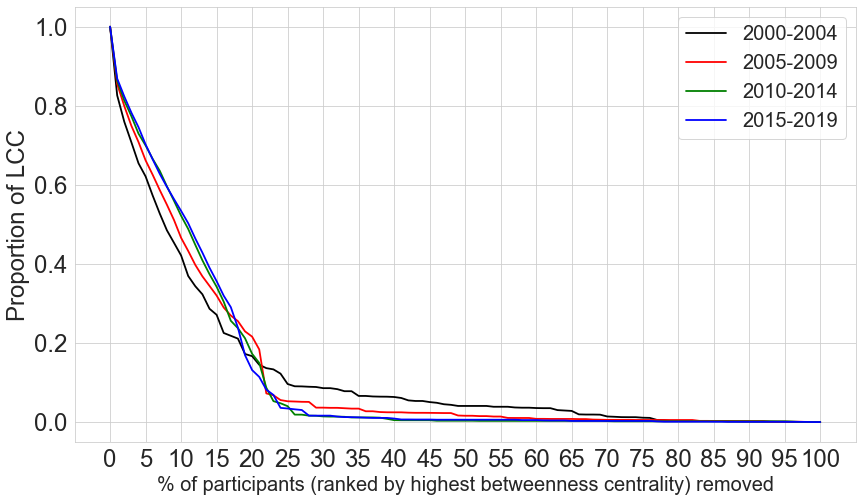

In [52]:
color_dict = {2004:"black",2009:"red",2014:"green",2019:"blue"}
linestyle_dict = {2004:"dashdot",2009:"dashed",2014:"dotted",2019:"solid"}

fig, ax1 = plt.subplots(figsize=(14,8))

for yr in [2004,2009,2014,2019]:
    y1 = []
    
    x1 = [i for i in range(0,101)]
    
    for i in range(0,101):
        y1.append(yearly_lcc_trimmed_dict1[yr]['overall'][i]/yearly_lcc_trimmed_dict1[yr]['overall'][0])
    
    sns.lineplot(x = x1,y=y1,color=color_dict[yr], linewidth=1.8,label=str(yr-4)+'-'+str(yr),ax=ax1,linestyle="-",legend=False)
        
ax1.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax1.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0], size = 24)

ax1.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
ax1.set_xticklabels([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],size = 24)#,rotation=90)#fontsize='x-large')

ax1.set_xlabel('% of participants (ranked by highest betweenness centrality) removed',fontsize=20)
ax1.set_ylabel('Proportion of LCC',fontsize=24)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes,fontsize=20)


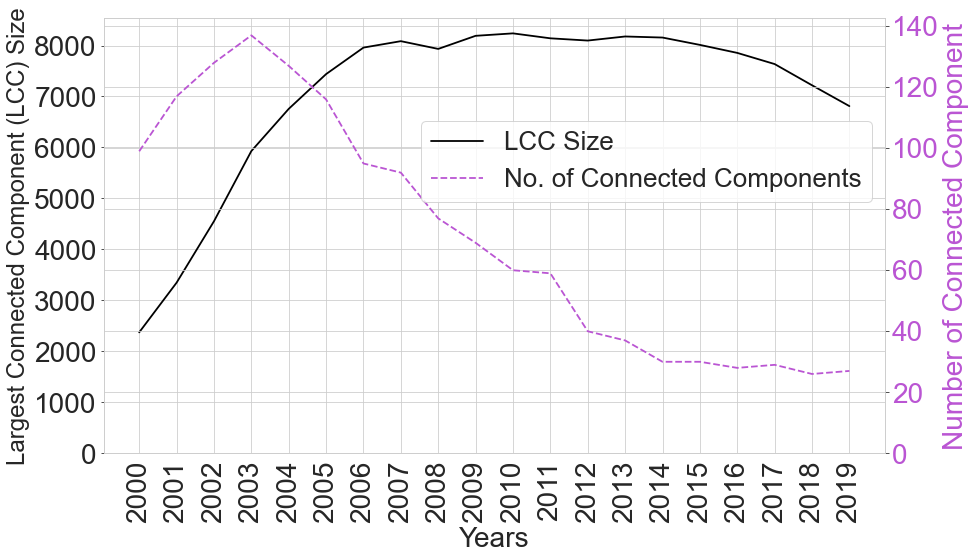

In [54]:
x1 = []
y1 = []
c = 0
for k in yearly_lcc_dict1:
    
    if k == 2020:
        continue
    x1.append(k)
    y1.append(yearly_lcc_dict1[k]['overall'])

fig, ax_h = plt.subplots(figsize=(14,8))

sns.lineplot(x=x1,y=y1, linewidth=1.8,ax=ax_h,linestyle="-",color="black",label="LCC Size",legend=False)#)#label=yr,

ax_h.set_xticks(x1)
ax_h.set_xticklabels(x1, rotation = 90,#ax_hx.get_xticklabels(), rotation=45,
    horizontalalignment='center',size = 28)#
   
ax_h.set_yticks([0,1000,2000,3000,4000,5000,6000,7000,8000])
ax_h.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000,8000], size = 28)

ax_h.set_xlabel('Years',fontdict={'fontsize': 28})
ax_h.set_ylabel('Largest Connected Component (LCC) Size',fontdict={'fontsize': 24})

ax_h_2 = ax_h.twinx()
y1 = []
x1 = []
for yr in range(2000,2020):#range(2000,2021):
    x1.append(yr)
    y1.append(yearly_connected_components[yr]['overall'])
    
sns.lineplot(x=x1,y=y1, linewidth=1.8,ax=ax_h_2,linestyle="--",color="mediumorchid",label='No. of Connected Components',legend=False)#)#label=yr,color=color_dict[yr]

ax_h_2.set_yticks([0,20,40,60,80,100,120,140])
ax_h_2.set_yticklabels([0,20,40,60,80,100,120,140], size = 28,color="mediumorchid")

ax_h_2.set_ylabel('Number of Connected Component',fontsize=28,color="mediumorchid")

fig.legend(bbox_to_anchor=(1,0.795),bbox_transform=ax_h.transAxes,fontsize=26)
#plt.savefig('../ietf_hackathon/plots/lcc_yearly_no_components.pdf', bbox_inches='tight')

# Accesing preprocessed email texts

Obtain an archive containing texts from us. Unpack it, this will create a "segmented_texts" folder which contains 3 files for each mailing list. E.g., for arp222:
- arp222-meta.csv -- dataFrame with columns: message-id, from, to, date, subject
- arp222-full.pickle -- dictionary that maps message-id to a segmentation of an email (str &rarr; List\<EmailSegment\>)
- arp222-simple.csv -- same as previous, but the segmentation is of length 1 and contains a single segment that has the unpreprocessed raw text of the email

(This was tested using Python 3.9.4)


In [6]:
from ietf_hackathon.email_segmentation import EmailSegment 
import pandas as pd, pickle

In [2]:
example_list_name = "arp222"

### Message metadata

In [13]:
meta_df = pd.read_csv("./segmented_texts/" + example_list_name + "-meta.csv")
meta_df.head()

,Unnamed: 0,message_id,from,to,date,subject
0,0,<20100719221922.0DA383A6A7F@core3.amsl.com>,IESG Secretary <iesg-secretary@ietf.org>,ietf-announce@ietf.org,2010-07-19 15:19:22,[arp222] New Non-WG Mailing List: arp222@ietf.org
1,1,<4C464ED1.1000601@gmail.com>,Brian E Carpenter <brian.e.carpenter@gmail.com>,"ldunbar@huawei.com, shares@ndzh.com",2010-07-21 13:35:13,Re: [arp222] New Non-WG Mailing List: arp222@i...
2,2,<000701cb28f4$ae1c90b0$0a55b210$@com>,Susan Hares <skh@ndzh.com>,'Brian E Carpenter' <brian.e.carpenter@gmail.c...,2010-07-21 12:49:23,Re: [arp222] New Non-WG Mailing List: arp222@i...


### Raw texts

In [14]:
raw_segmentations = pickle.load(open("./segmented_texts/" + example_list_name + "-simple.pickle", "rb"))
for msg_id in raw_segmentations:
    first_segment = raw_segmentations[msg_id][0] # takes the first and only segment
    raw_text = first_segment.content
    print("*** Raw text: ***\n\n" + raw_text)
    break # process only first message in demo

*** Raw text: ***

A new IETF non-working group email list has been created.

List address: arp222@ietf.org
Archive: http://www.ietf.org/mail-archive/web/arp222/
To subscribe: https://www.ietf.org/mailman/listinfo/arp222

Description: This list discusses issues associated with large amount of
virtual machines being introduced to data center. 

Virtual machines allow one physical server to support multiple hosts (20,
30, or hundreds of). As virtual machines are introduced to the Data Center
(DC), the number of hosts within one subnet can grow dramatically.  This
DC growth could tremendously impact to networks and hosts. Data Centers
can span multiple subnets in a single site or multiple sites across a
single AS or multiple ASes.

One issue is frequent ARP requests from hosts. All hosts send out
frequent ARP requests due to their cache being aged out in minutes. With
tens of thousands of hosts (each with a distinct MAC address) in one Data
Center (DC), the amount of ARP packets per secon

### Segmented texts

In [19]:
segmentations = pickle.load(open("./segmented_texts/" + example_list_name + "-full.pickle", "rb"))
# you can process segments individually:
for msg_id in segmentations:
    for segment in segmentations[msg_id]: # segment is of type EmailSegment
        print("-----------")
        print(segment.id) # unique within thread but not globally
        print(segment.type) # "normal", "quote", or "signature"
        print(segment.antecedent) # if type == "quote" then antecedent will have the id of the original segment being quoted
        print(segment.content) # text content of the segment
        
    break
    


-----------
0
normal
None
A new IETF non-working group email list has been created.
-----------
25
normal
None

List address: arp222@ietf.org
Archive: http://www.ietf.org/mail-archive/web/arp222/
To subscribe: https://www.ietf.org/mailman/listinfo/arp222
-----------
26
normal
None

Description: This list discusses issues associated with large amount of
virtual machines being introduced to data center.
-----------
27
normal
None

Virtual machines allow one physical server to support multiple hosts (20,
30, or hundreds of). As virtual machines are introduced to the Data Center
(DC), the number of hosts within one subnet can grow dramatically.  This
DC growth could tremendously impact to networks and hosts. Data Centers
can span multiple subnets in a single site or multiple sites across a
single AS or multiple ASes.
-----------
28
normal
None

One issue is frequent ARP requests from hosts. All hosts send out
frequent ARP requests due to their cache being aged out in minutes. With
tens of 

P.S. I just realised the information about which emails are in the same thread is lost here so the "id" and "antecedent" fields are probably not very useful here.

In [21]:
# instead of looking at each segment individually, you probably just want to loop over emails like this:
for msg_id in segmentations:
    everything = "\n\n".join([segment.content for segment in segmentations[msg_id]]) # similar to the raw text but not identical (cleaned up a bit more)
    print("*** All segments joined regardless of type: ***\n\n" + everything)
    
    # below is the version that seems to me the best variant for buzzword / liwc analysis
    onlynormal = "\n\n".join([segment.content for segment in segmentations[msg_id] if segment.type == "normal"])
    print("\n\n\n\n*** Only normal (quotes and signatures removed): ***\n\n" + onlynormal)
    
    normalandquotes = "\n\n".join([segment.content for segment in segmentations[msg_id] if segment.type == "normal" or segment.type == "quote"])
    print("\n\n\n\n*** Normal + quotes but no signatures: ***\n\n" + normalandquotes)
    
    break # process only first message in demo

*** All segments joined regardless of type: ***

A new IETF non-working group email list has been created.


List address: arp222@ietf.org
Archive: http://www.ietf.org/mail-archive/web/arp222/
To subscribe: https://www.ietf.org/mailman/listinfo/arp222


Description: This list discusses issues associated with large amount of
virtual machines being introduced to data center.


Virtual machines allow one physical server to support multiple hosts (20,
30, or hundreds of). As virtual machines are introduced to the Data Center
(DC), the number of hosts within one subnet can grow dramatically.  This
DC growth could tremendously impact to networks and hosts. Data Centers
can span multiple subnets in a single site or multiple sites across a
single AS or multiple ASes.


One issue is frequent ARP requests from hosts. All hosts send out
frequent ARP requests due to their cache being aged out in minutes. With
tens of thousands of hosts (each with a distinct MAC address) in one Data
Center (DC), th

This was not a particularly good example because there are no quotes in it, so you can't see the difference between the second and third case, but at least you have the code examples for both.

# Sentiment analysis

In [ ]:
import pandas as pd
df = pd.read_csv("./ietf_hackathon/sentiment-data-ietf.csv")
df.columns

The scores that are used for the plots were obtained by tha vader library -- https://github.com/cjhutto/vaderSentiment

In [ ]:
df2 = df[["year","vader_sentiment_neutral","vader_sentiment_negative", "vader_sentiment_positive"]]

In [ ]:
years = list(df2.year) * 3
scores = list(df2.vader_sentiment_neutral) + list(df2.vader_sentiment_negative) + list(df2.vader_sentiment_positive)
types = ["Neutral"] * df2.shape[0] + ["Negative"] * df2.shape[0] + ["Positive"] * df2.shape[0]
df_all = pd.DataFrame(zip(years, scores, types), columns = ["Years","Scores","Types"])
df_all.head(10)

Text(0.5, 1.0, 'Sentiment scores per year (ietf mailing list)')

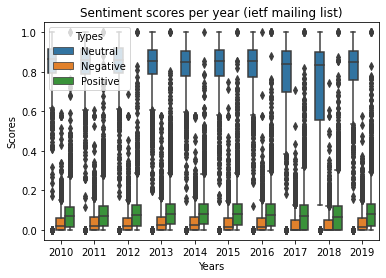

In [16]:
plt = sns.boxplot(data=df_all, x='Years', y='Scores', hue='Types')
plt.set_title("Sentiment scores per year (ietf mailing list)")

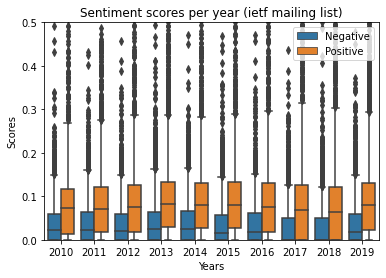

In [18]:
plt = sns.boxplot(data=df_all[df_all.Types!="Neutral"], x='Years', y='Scores', hue='Types')
plt.set_title("Sentiment scores per year (ietf mailing list)")
plt.set_ylim(0,0.5)
plt.legend(loc='upper right')